In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

#Importing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Get the dataset and print fews rows and column
df=pd.read_excel("customer_retention_dataset.xlsx")
df.head(10)

1Gender of respondent 2 How old are you?   \
0                  Male         31-40 years   
1                Female         21-30 years   
2                Female         21-30 years   
3                  Male         21-30 years   
4                Female         21-30 years   
5                Female         31-40 years   
6                  Male         41-50 yaers   
7                  Male         41-50 yaers   
8                Female  Less than 20 years   
9                Female         31-40 years   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    
5                                 Noida   
6                                 Delhi   
7                                 Delhi   
8                                 Solan   
9                                 Delhi   

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       
5                                             201308       
6                                             110011       
7                                             110018       
8                                             173229       
9                                             110039       

  5 Since How Long You are Shopping Online ?  \
0                              Above 4 years   
1                              Above 4 years   
2                                  3-4 years   
3                                  3-4 years   
4                                  2-3 years   
5                              Above 4 years   
6                              Above 4 years   
7                                  3-4 years   
8                                  2-3 years   
9                           Less than 1 year   

  6 How many times you have made an online purchase in the past 1 year?  \
0                                        31-40 times                      
1                                 41 times and above                      
2                                 41 times and above                      
3                                 Less than 10 times                      
4                                        11-20 times                      
5                                 41 times and above                      
6                                        31-40 times                      
7                                 Less than 10 times                      
8                                 Less than 10 times                      
9                                 Less than 10 times                      

  7 How do you access the internet while shopping on-line?  \
0                                            Dial-up         
1                                              Wi-Fi         
2                                    Mobile Internet         
3                                    Mobile Internet         
4                                              Wi-Fi         
5                                              Wi-Fi         
6                                              Wi-Fi         
7                                    Mobile Internet         
8                                              Wi-Fi         
9                                              Wi-Fi         

  8 Which device do you use to access the online shopping?  \
0                                            Desktop         
1                                         Smartphone         
2                                         Smartphone         
3                                         Smartphone         
4

In [3]:
#print summary
print('shape ......>',df.shape)
print('Each column and data type and its count','\n')
print(df.info())

shape ......> (269, 71)
Each column and data type and its count 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                  

None


.Their are 269 rows and 71 columns.                         
.In this dataset,only few are int datatype and rest are of object datatype.          

In [4]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [5]:
#first we have to encode all the columns having datatype 'object'.
#Importing OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

In [6]:
#Encoding 1Gender of respondent
ord_encoder=OrdinalEncoder(categories=[['Male','Female']])
df1=ord_encoder.fit_transform(df[['1Gender of respondent']])
df1

array([[0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],

In [7]:
#Encoding 2 How old are you?
ord_encoder=OrdinalEncoder(categories=[['31-40 years','21-30 years','41-50 yaers','Less than 20 years','51 years and above']])
df2=ord_encoder.fit_transform(df[['2 How old are you? ']])
df2

array([[0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [2.],
       [2.],
       [3.],
       [0.],
       [0.],
       [2.],
       [4.],
       [0.],
       [1.],
       [1.],
       [0.],
       [2.],
       [2.],
       [1.],
       [1.],
       [0.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [0.],
       [2.],
       [2.],
       [3.],
       [0.],
       [0.],
       [2.],
       [4.],
       [1.],
       [0.],
       [2.],
       [2.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [2.],
       [2.],
       [3.],
       [0.],
       [0.],
       [2.],
       [4.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [2.],
       [2.],
       [3.],
       [0.],
       [0.],
       [2.],
       [4.],
       [0.],
       [2.],
       [2.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [2.],
       [2.],

In [8]:
#Encoding columns (3 Which city do you shop online from?) 
ord_encoder=OrdinalEncoder(categories=[['Delhi','Greater Noida','Karnal ','Bangalore ','Noida','Moradabad','Solan','Merrut','Ghaziabad','Bulandshahr','Gurgaon ']])
df3=ord_encoder.fit_transform(df[['3 Which city do you shop online from?']])
df3

array([[ 0.],
       [ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 0.],
       [ 0.],
       [ 6.],
       [ 0.],
       [ 5.],
       [ 4.],
       [10.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 0.],
       [ 0.],
       [ 6.],
       [ 4.],
       [10.],
       [ 1.],
       [ 1.],
       [ 7.],
       [ 3.],
       [ 8.],
       [ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 0.],
       [ 1.],
       [ 7.],
       [ 3.],
       [ 4.],
       [ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 0.],
       [ 1.],
       [ 7.],
       [ 3.],
       [ 4.],
       [ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 0.],
       [ 1.],
       [ 7.],
       [ 3.],
       [ 4.],
       [ 0.],
       [ 1.],
       [ 7.],
       [ 3.],
      

In [9]:
#Encoding columns (5 Since How Long You are Shopping Online ? ) 
ord_encoder=OrdinalEncoder(categories=[['Above 4 years','3-4 years','2-3 years','Less than 1 year','1-2 years']])
df4=ord_encoder.fit_transform(df[['5 Since How Long You are Shopping Online ?']])
df4

array([[0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [0.],
       [0.],
       [1.],
       [2.],
       [3.],
       [0.],
       [0.],
       [2.],
       [0.],
       [3.],
       [2.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [1.],
       [0.],
       [0.],
       [1.],
       [2.],
       [3.],
       [0.],
       [0.],
       [2.],
       [0.],
       [2.],
       [0.],
       [0.],
       [1.],
       [2.],
       [3.],
       [0.],
       [0.],
       [2.],
       [0.],
       [1.],
       [2.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [1.],
       [2.],
       [3.],
       [0.],
       [0.],
       [1.],
       [2.],
       [3.],
       [0.],
       [0.],
       [1.],
       [2.],
       [3.],
       [0.],
       [2.],
       [0.],
       [1.],
       [2.],
       [3.],
       [0.],
       [0.],
       [1.],
       [2.],
       [3.],
       [0.],
       [2.],
       [0.],

In [10]:
#Encoding columns (6 How many times you have made an online purchase in the past 1 year?) 
ord_encoder=OrdinalEncoder(categories=[['31-40 times','41 times and above','Less than 10 times','11-20 times','21-30 times','42 times and above']])
df5=ord_encoder.fit_transform(df[['6 How many times you have made an online purchase in the past 1 year?']])
df5

array([[0.],
       [1.],
       [1.],
       [2.],
       [3.],
       [1.],
       [0.],
       [2.],
       [2.],
       [2.],
       [4.],
       [2.],
       [2.],
       [3.],
       [1.],
       [1.],
       [4.],
       [2.],
       [2.],
       [3.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [3.],
       [1.],
       [0.],
       [2.],
       [2.],
       [2.],
       [4.],
       [2.],
       [2.],
       [3.],
       [2.],
       [3.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [3.],
       [1.],
       [0.],
       [2.],
       [2.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [3.],
       [1.],
       [2.],
       [3.],
       [1.],
       [0.],
       [2.],
       [2.],
       [1.],
       [0.],
       [0.],
       [2.],
       [2.],
       [5.],
       [0.],
       [0.],
       [2.],
       [1.],
       [0.],
       [0.],
       [2.],
       [2.],

In [11]:
#Encoding columns (7 How do you access the internet while shopping on-line?) 
ord_encoder=OrdinalEncoder(categories=[['Dial-up','Wi-Fi','Mobile internet','Mobile Internet']])
df6=ord_encoder.fit_transform(df[['7 How do you access the internet while shopping on-line?']])
df6

array([[0.],
       [1.],
       [3.],
       [3.],
       [1.],
       [1.],
       [1.],
       [3.],
       [1.],
       [1.],
       [3.],
       [1.],
       [1.],
       [1.],
       [1.],
       [3.],
       [3.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],

In [12]:
#Encoding columns (8 Which device do you use to access the online shopping? ) 
ord_encoder=OrdinalEncoder(categories=[['Desktop','Smartphone','Tablet','Laptop']])
df7=ord_encoder.fit_transform(df[['8 Which device do you use to access the online shopping?']])
df7

array([[0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [1.],
       [1.],
       [3.],
       [3.],
       [3.],
       [1.],
       [1.],
       [2.],
       [2.],
       [0.],
       [1.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [3.],
       [3.],
       [3.],
       [3.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [0.],
       [0.],
       [1.],
       [3.],
       [3.],
       [3.],
       [3.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],

In [13]:
#Encoding columns ( 9 What is the screen size of your mobile device?)
ord_encoder=OrdinalEncoder(categories=[['Others','4.7 inches','5.5 inches','5 inches']])
df8=ord_encoder.fit_transform(df[['9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ']])
df8

array([[0.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [0.],
       [0.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [2.],
       [0.],
       [0.],
       [0.],
       [2.],
       [1.],
       [3.],
       [2.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [0.],
       [0.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [2.],
       [2.],
       [2.],
       [0.],
       [0.],
       [0.],
       [1.],
       [2.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [14]:
#Encoding columns (10 What is the operating system (OS) of your device?\t\t\t\t)
ord_encoder=OrdinalEncoder(categories=[['Window/windows Mobile','IOS/Mac','Android']])
df9=ord_encoder.fit_transform(df[['10 What is the operating system (OS) of your device?\t\t\t\t                                          ']])
df9

array([[0.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [0.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [0.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [0.],
       [0.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [2.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [15]:
#Encoding columns (11 What browser do you run on your device to access the website?\t\t\t ) 
ord_encoder=OrdinalEncoder(categories=[['Google chrome','Safari','Opera','Mozilla Firefox']])
df10=ord_encoder.fit_transform(df[['11 What browser do you run on your device to access the website?\t\t\t                                                          ']])
df10

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [16]:
#Encoding columns (12 Which channel did you follow to arrive at your favorite online store for the first time?)
ord_encoder=OrdinalEncoder(categories=[['Search Engine','Content Marketin','Display Adverts','Content Marketing']])
df11=ord_encoder.fit_transform(df[['12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ']])
df11

array([[0.],
       [0.],
       [0.],
       [0.],
       [3.],
       [0.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [3.],
       [0.],
       [2.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.],
       [3.],
       [0.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [3.],
       [0.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [17]:
#Encoding columns (13 After first visit, how do you reach the online retail store?\t\t\t\t)
ord_encoder=OrdinalEncoder(categories=[['Search Engine','Via application','Direct URL','Social Media','E-mail']])
df12=ord_encoder.fit_transform(df[['13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ']])
df12

array([[0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [2.],
       [4.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [4.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [2.],
       [4.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [4.],
       [4.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [4.],
       [4.],
       [0.],
       [1.],
       [1.],
       [0.],
       [4.],
       [0.],
       [2.],
       [2.],
       [0.],
       [0.],
       [2.],

In [18]:
#Encoding columns (14 How much time do you explore the e- retail store before making a purchase decision? ) 
ord_encoder=OrdinalEncoder(categories=[['6-10 mins','more than 15 mins','11-15 mins','Less than 1 min','1-5 mins']])
df13=ord_encoder.fit_transform(df[['14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ']])
df13

array([[0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [1.],
       [2.],
       [2.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [1.],
       [2.],
       [2.],
       [0.],
       [1.],
       [0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [2.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [2.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [0.],

In [19]:
#Encoding columns (15 What is your preferred payment Option?)
ord_encoder=OrdinalEncoder(categories=[['E-wallets (Paytm, Freecharge etc.)','Credit/Debit cards','Cash on delivery (CoD)']])
df14=ord_encoder.fit_transform(df[['15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ']])
df14

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [20]:
#Encoding columns (16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t)
ord_encoder=OrdinalEncoder(categories=[['Sometimes','Very frequently','Never','Frequently']])
df15=ord_encoder.fit_transform(df[['16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ']])
df15

array([[0.],
       [1.],
       [0.],
       [2.],
       [3.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [3.],
       [3.],
       [0.],
       [2.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [3.],
       [0.],
       [1.],
       [0.],
       [2.],
       [3.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [2.],
       [2.],
       [3.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [2.],
       [2.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [21]:
#Encoding columns (17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t)
ord_encoder=OrdinalEncoder(categories=[['Lack of trust','Promo code not applicable','Better alternative offer','No preferred mode of payment','Change in price']])
df16=ord_encoder.fit_transform(df[['17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ']])
df16

array([[0.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [4.],
       [3.],
       [0.],
       [4.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [4.],
       [3.],
       [0.],
       [4.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [0.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [4.],
       [3.],
       [0.],
       [4.],
       [2.],
       [2.],
       [0.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [4.],
       [4.],
       [3.],
       [0.],
       [4.],
       [2.],
       [2.],
       [0.],
       [1.],
       [1.],
       [2.],
       [2.],
       [4.],
       [4.],
       [0.],
       [1.],
       [1.],
       [2.],
       [4.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [4.],

In [22]:
#Encoding columns (18 The content on the website must be easy to read and understand)
ord_encoder=OrdinalEncoder(categories=[['Strongly disagree (1)','Dis-agree (2)','Indifferent (3)','Agree (4)','Strongly agree (5)']])
df17=ord_encoder.fit_transform(df[['18 The content on the website must be easy to read and understand']])
df17

array([[3.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [3.],
       [0.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [0.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [3.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [3.],
       [0.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [4.],
       [3.],
       [0.],
       [0.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [3.],
       [3.],
       [0.],
       [0.],
       [3.],
       [4.],
       [4.],
       [3.],
       [0.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],

In [23]:
#Encoding columns (19 Information on similar product to the one highlighted  is important for product comparison)
ord_encoder=OrdinalEncoder(categories=[['Strongly disagree (1)','Dis-agree (2)','Indifferent (3)','Agree (4)','Strongly agree (5)']])
df18=ord_encoder.fit_transform(df[['19 Information on similar product to the one highlighted  is important for product comparison']])
df18

array([[2.],
       [4.],
       [3.],
       [3.],
       [2.],
       [4.],
       [3.],
       [1.],
       [3.],
       [4.],
       [2.],
       [4.],
       [4.],
       [4.],
       [3.],
       [3.],
       [2.],
       [4.],
       [3.],
       [3.],
       [2.],
       [1.],
       [3.],
       [4.],
       [2.],
       [4.],
       [4.],
       [4.],
       [3.],
       [3.],
       [2.],
       [2.],
       [4.],
       [3.],
       [3.],
       [2.],
       [4.],
       [3.],
       [1.],
       [3.],
       [4.],
       [2.],
       [4.],
       [4.],
       [2.],
       [4.],
       [3.],
       [3.],
       [3.],
       [2.],
       [4.],
       [3.],
       [1.],
       [1.],
       [3.],
       [4.],
       [2.],
       [4.],
       [4.],
       [2.],
       [4.],
       [3.],
       [3.],
       [3.],
       [1.],
       [1.],
       [2.],
       [4.],
       [3.],
       [3.],
       [1.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [2.],

In [24]:
#Encoding columns (20 Complete information on listed seller and product being offered is important for purchase decision.)
ord_encoder=OrdinalEncoder(categories=[['Strongly disagree (1)','Dis-agree (2)','Indifferent (3)','Agree (4)','Strongly agree (5)']])
df19=ord_encoder.fit_transform(df[['20 Complete information on listed seller and product being offered is important for purchase decision.']])
df19

array([[2.],
       [4.],
       [3.],
       [2.],
       [2.],
       [4.],
       [3.],
       [1.],
       [4.],
       [3.],
       [3.],
       [3.],
       [4.],
       [0.],
       [3.],
       [2.],
       [2.],
       [4.],
       [3.],
       [2.],
       [2.],
       [1.],
       [4.],
       [3.],
       [3.],
       [3.],
       [4.],
       [0.],
       [3.],
       [2.],
       [2.],
       [2.],
       [4.],
       [3.],
       [2.],
       [2.],
       [4.],
       [3.],
       [1.],
       [4.],
       [3.],
       [3.],
       [3.],
       [4.],
       [2.],
       [4.],
       [3.],
       [2.],
       [2.],
       [2.],
       [4.],
       [3.],
       [1.],
       [1.],
       [4.],
       [3.],
       [3.],
       [3.],
       [4.],
       [2.],
       [4.],
       [3.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [4.],
       [3.],
       [2.],
       [1.],
       [3.],
       [3.],
       [4.],
       [0.],
       [3.],
       [3.],

In [25]:
#Encoding columns (21 All relevant information on listed products must be stated clearly)
ord_encoder=OrdinalEncoder(categories=[['Strongly disagree (1)','Dis-agree (2)','Indifferent (3)','Agree (4)','Strongly agree (5)']])
df20=ord_encoder.fit_transform(df[['21 All relevant information on listed products must be stated clearly']])
df20

array([[3.],
       [4.],
       [3.],
       [3.],
       [3.],
       [4.],
       [3.],
       [0.],
       [3.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [3.],
       [3.],
       [4.],
       [3.],
       [3.],
       [3.],
       [0.],
       [3.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [3.],
       [3.],
       [3.],
       [4.],
       [3.],
       [3.],
       [3.],
       [4.],
       [3.],
       [0.],
       [3.],
       [3.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [3.],
       [3.],
       [3.],
       [3.],
       [4.],
       [3.],
       [0.],
       [0.],
       [3.],
       [3.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [3.],
       [3.],
       [3.],
       [0.],
       [0.],
       [3.],
       [4.],
       [3.],
       [3.],
       [0.],
       [3.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],

In [26]:
#Encoding columns (22 Ease of navigation in website)
ord_encoder=OrdinalEncoder(categories=[['Strongly disagree (1)','Dis-agree (2)','Indifferent (3)','Agree (4)','Strongly agree (5)']])
df21=ord_encoder.fit_transform(df[['22 Ease of navigation in website']])
df21

array([[3.],
       [4.],
       [3.],
       [4.],
       [3.],
       [4.],
       [3.],
       [0.],
       [3.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [3.],
       [4.],
       [3.],
       [4.],
       [3.],
       [0.],
       [3.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [3.],
       [3.],
       [4.],
       [3.],
       [4.],
       [3.],
       [4.],
       [3.],
       [0.],
       [3.],
       [4.],
       [3.],
       [4.],
       [4.],
       [3.],
       [4.],
       [3.],
       [4.],
       [4.],
       [3.],
       [4.],
       [3.],
       [0.],
       [0.],
       [3.],
       [4.],
       [3.],
       [4.],
       [4.],
       [3.],
       [4.],
       [3.],
       [4.],
       [4.],
       [0.],
       [0.],
       [3.],
       [4.],
       [3.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],

In [27]:
#Encoding columns (23 Loading and processing speed)
ord_encoder=OrdinalEncoder(categories=[['Strongly disagree (1)','Dis-agree (2)','Indifferent (3)','Agree (4)','Strongly agree (5)']])
df22=ord_encoder.fit_transform(df[['23 Loading and processing speed']])
df22

array([[0.],
       [4.],
       [3.],
       [3.],
       [4.],
       [4.],
       [3.],
       [1.],
       [3.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [1.],
       [3.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [0.],
       [4.],
       [3.],
       [3.],
       [4.],
       [4.],
       [3.],
       [1.],
       [3.],
       [4.],
       [4.],
       [3.],
       [4.],
       [0.],
       [4.],
       [3.],
       [3.],
       [3.],
       [4.],
       [4.],
       [3.],
       [1.],
       [1.],
       [3.],
       [4.],
       [4.],
       [3.],
       [4.],
       [0.],
       [4.],
       [3.],
       [3.],
       [3.],
       [1.],
       [1.],
       [0.],
       [4.],
       [3.],
       [3.],
       [1.],
       [4.],
       [3.],
       [4.],
       [4.],
       [3.],
       [4.],

In [28]:
#Encoding columns (24 User friendly Interface of the website)
ord_encoder=OrdinalEncoder(categories=[['Strongly disagree (1)','Dis-agree (2)','Indifferent (3)','Agree (4)','Strongly agree (5)']])
df23=ord_encoder.fit_transform(df[['24 User friendly Interface of the website']])
df23

array([[1.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [0.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [0.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [1.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [0.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [1.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [0.],
       [0.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [1.],
       [4.],
       [4.],
       [4.],
       [4.],
       [0.],
       [0.],
       [1.],
       [4.],
       [4.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [3.],

In [29]:
#Encoding columns (25 Convenient Payment methods)
ord_encoder=OrdinalEncoder(categories=[['Strongly disagree (1)','Dis-agree (2)','Indifferent (3)','Agree (4)','Strongly agree (5)']])
df24=ord_encoder.fit_transform(df[['25 Convenient Payment methods']])
df24

array([[1.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [1.],
       [4.],
       [3.],
       [3.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [1.],
       [4.],
       [3.],
       [3.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [1.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [1.],
       [4.],
       [3.],
       [3.],
       [3.],
       [4.],
       [1.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [1.],
       [1.],
       [4.],
       [3.],
       [3.],
       [3.],
       [4.],
       [1.],
       [4.],
       [4.],
       [4.],
       [4.],
       [1.],
       [1.],
       [1.],
       [4.],
       [4.],
       [4.],
       [1.],
       [3.],
       [3.],
       [4.],
       [4.],
       [4.],
       [3.],

In [30]:
#Encoding columns (26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time)
ord_encoder=OrdinalEncoder(categories=[['Strongly disagree (1)','Disagree (2)','indifferent  (3)','Agree (4)','Strongly agree (5)']])
df25=ord_encoder.fit_transform(df[['26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time']])
df25

array([[1.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [3.],
       [1.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [3.],
       [3.],
       [3.],
       [1.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [3.],
       [3.],
       [1.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [3.],
       [1.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [1.],
       [4.],
       [4.],
       [3.],
       [3.],
       [3.],
       [4.],
       [3.],
       [1.],
       [1.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [1.],
       [4.],
       [4.],
       [3.],
       [3.],
       [1.],
       [1.],
       [1.],
       [4.],
       [4.],
       [3.],
       [1.],
       [4.],
       [3.],
       [4.],
       [4.],
       [3.],
       [4.],

In [31]:
#Encoding columns (27 Empathy (readiness to assist with queries) towards the customers)
ord_encoder=OrdinalEncoder(categories=[['Strongly disagree (1)','Disagree (2)','indifferent (3)','Agree (4)','Strongly agree (5)']])
df26=ord_encoder.fit_transform(df[['27 Empathy (readiness to assist with queries) towards the customers']])
df26

array([[4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [0.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [0.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [0.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [0.],
       [0.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [0.],
       [0.],
       [4.],
       [4.],
       [4.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [4.],
       [2.],
       [3.],

In [32]:
#Encoding columns (28 Being able to guarantee the privacy of the customer)
ord_encoder=OrdinalEncoder(categories=[['Strongly disagree (1)','Disagree (2)','indifferent (3)','Agree (4)','Strongly agree (5)']])
df27=ord_encoder.fit_transform(df[['28 Being able to guarantee the privacy of the customer']])
df27

array([[3.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [3.],
       [2.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [3.],
       [4.],
       [3.],
       [2.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [3.],
       [2.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [3.],
       [2.],
       [2.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [2.],
       [2.],
       [3.],
       [4.],
       [4.],
       [4.],
       [2.],
       [4.],
       [4.],
       [4.],
       [4.],
       [2.],
       [4.],

In [33]:
#Encoding columns (29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.))
ord_encoder=OrdinalEncoder(categories=[['Strongly disagree (1)','Disagree (2)','indifferent (3)','Agree (4)','Strongly agree (5)']])
df28=ord_encoder.fit_transform(df[['29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)']])
df28

array([[3.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [2.],
       [0.],
       [4.],
       [3.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [2.],
       [0.],
       [4.],
       [3.],
       [4.],
       [3.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [2.],
       [3.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [2.],
       [3.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [2.],
       [0.],
       [3.],
       [3.],

In [34]:
#Encoding columns (30 Online shopping gives monetary benefit and discounts)
ord_encoder=OrdinalEncoder(categories=[['Strongly disagree (1)','Dis-agree (2)','indifferent (3)','Agree (4)','Strongly agree (5)']])
df29=ord_encoder.fit_transform(df[['30 Online shopping gives monetary benefit and discounts']])
df29

array([[2.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [3.],
       [0.],
       [4.],
       [3.],
       [1.],
       [2.],
       [3.],
       [2.],
       [4.],
       [3.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [0.],
       [4.],
       [3.],
       [1.],
       [2.],
       [3.],
       [2.],
       [4.],
       [3.],
       [4.],
       [2.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [3.],
       [0.],
       [4.],
       [3.],
       [1.],
       [2.],
       [3.],
       [2.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [4.],
       [3.],
       [0.],
       [0.],
       [4.],
       [3.],
       [1.],
       [2.],
       [3.],
       [2.],
       [4.],
       [4.],
       [3.],
       [3.],
       [0.],
       [0.],
       [2.],
       [4.],
       [4.],
       [3.],
       [0.],
       [3.],
       [2.],
       [3.],
       [2.],
       [3.],
       [1.],

In [35]:
#Encoding columns (31 Enjoyment is derived from shopping online)
ord_encoder=OrdinalEncoder(categories=[['Strongly disagree (1)','Dis-agree (2)','indifferent (3)','Agree (4)','Strongly agree (5)']])
df30=ord_encoder.fit_transform(df[['31 Enjoyment is derived from shopping online']])
df30

array([[0.],
       [4.],
       [4.],
       [2.],
       [4.],
       [4.],
       [3.],
       [0.],
       [3.],
       [3.],
       [2.],
       [1.],
       [3.],
       [2.],
       [4.],
       [2.],
       [4.],
       [4.],
       [3.],
       [2.],
       [4.],
       [0.],
       [3.],
       [3.],
       [2.],
       [1.],
       [3.],
       [2.],
       [4.],
       [2.],
       [4.],
       [0.],
       [4.],
       [4.],
       [2.],
       [4.],
       [4.],
       [3.],
       [0.],
       [3.],
       [3.],
       [2.],
       [1.],
       [3.],
       [0.],
       [4.],
       [4.],
       [2.],
       [2.],
       [4.],
       [4.],
       [3.],
       [0.],
       [0.],
       [3.],
       [3.],
       [2.],
       [1.],
       [3.],
       [0.],
       [4.],
       [4.],
       [2.],
       [2.],
       [0.],
       [0.],
       [0.],
       [4.],
       [4.],
       [2.],
       [0.],
       [3.],
       [1.],
       [3.],
       [2.],
       [2.],
       [2.],

In [36]:
#Encoding columns (32 Shopping online is convenient and flexible)
ord_encoder=OrdinalEncoder(categories=[['Strongly disagree (1)','Dis-agree (2)','indifferent (3)','Agree (4)','Strongly agree (5)']])
df31=ord_encoder.fit_transform(df[['32 Shopping online is convenient and flexible']])
df31

array([[1.],
       [4.],
       [4.],
       [2.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [3.],
       [4.],
       [4.],
       [2.],
       [4.],
       [4.],
       [3.],
       [2.],
       [4.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [3.],
       [4.],
       [4.],
       [2.],
       [4.],
       [1.],
       [4.],
       [4.],
       [2.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [3.],
       [1.],
       [4.],
       [4.],
       [2.],
       [2.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [3.],
       [1.],
       [4.],
       [4.],
       [2.],
       [2.],
       [4.],
       [4.],
       [1.],
       [4.],
       [4.],
       [2.],
       [4.],
       [3.],
       [4.],
       [3.],
       [4.],
       [3.],
       [3.],

In [37]:
#Encoding columns (33 Return and replacement policy of the e-tailer is important for purchase decision)
ord_encoder=OrdinalEncoder(categories=[['Strongly disagree (1)','Dis-agree (2)','indifferent (3)','Agree (4)','Strongly agree (5)']])
df32=ord_encoder.fit_transform(df[['33 Return and replacement policy of the e-tailer is important for purchase decision']])
df32

array([[1.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [1.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [1.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [1.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [4.],
       [1.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],

In [38]:
#Encoding columns (34 Gaining access to loyalty programs is a benefit of shopping online)
ord_encoder=OrdinalEncoder(categories=[['Strongly disagree (1)','Dis-agree (2)','indifferent (3)','Agree (4)','Strongly agree (5)']])
df33=ord_encoder.fit_transform(df[['34 Gaining access to loyalty programs is a benefit of shopping online']])
df33

array([[3.],
       [4.],
       [4.],
       [2.],
       [1.],
       [4.],
       [4.],
       [4.],
       [3.],
       [3.],
       [0.],
       [3.],
       [4.],
       [2.],
       [4.],
       [2.],
       [1.],
       [4.],
       [4.],
       [2.],
       [1.],
       [4.],
       [3.],
       [3.],
       [0.],
       [3.],
       [4.],
       [2.],
       [4.],
       [2.],
       [1.],
       [3.],
       [4.],
       [4.],
       [2.],
       [1.],
       [4.],
       [4.],
       [4.],
       [3.],
       [3.],
       [0.],
       [3.],
       [4.],
       [3.],
       [4.],
       [4.],
       [2.],
       [2.],
       [1.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [3.],
       [0.],
       [3.],
       [4.],
       [3.],
       [4.],
       [4.],
       [2.],
       [2.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [2.],
       [4.],
       [3.],
       [3.],
       [4.],
       [2.],
       [2.],
       [0.],

In [39]:
#Encoding columns (35 Displaying quality Information on the website improves satisfaction of customers)
ord_encoder=OrdinalEncoder(categories=[['Strongly disagree (1)','Dis-agree (2)','indifferent (3)','Agree (4)','Strongly agree (5)']])
df34=ord_encoder.fit_transform(df[['35 Displaying quality Information on the website improves satisfaction of customers']])
df34

array([[2.],
       [4.],
       [4.],
       [2.],
       [3.],
       [4.],
       [3.],
       [4.],
       [4.],
       [3.],
       [2.],
       [4.],
       [4.],
       [4.],
       [4.],
       [2.],
       [3.],
       [4.],
       [3.],
       [2.],
       [3.],
       [4.],
       [4.],
       [3.],
       [2.],
       [4.],
       [4.],
       [4.],
       [4.],
       [2.],
       [3.],
       [2.],
       [4.],
       [4.],
       [2.],
       [3.],
       [4.],
       [3.],
       [4.],
       [4.],
       [3.],
       [2.],
       [4.],
       [4.],
       [2.],
       [4.],
       [4.],
       [2.],
       [2.],
       [3.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [3.],
       [2.],
       [4.],
       [4.],
       [2.],
       [4.],
       [4.],
       [2.],
       [2.],
       [4.],
       [4.],
       [2.],
       [4.],
       [4.],
       [2.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [3.],
       [2.],

In [40]:
#Encoding columns (36 User derive satisfaction while shopping on a good quality website or application)
ord_encoder=OrdinalEncoder(categories=[['Strongly disagree (1)','Dis-agree (2)','indifferent (3)','Agree (4)','Strongly agree (5)']])
df35=ord_encoder.fit_transform(df[['36 User derive satisfaction while shopping on a good quality website or application']])
df35

array([[4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [3.],
       [3.],

In [41]:
#Encoding columns (37 Net Benefit derived from shopping online can lead to users satisfaction)
ord_encoder=OrdinalEncoder(categories=[['Strongly disagree (1)','Dis-agree (2)','indifferent (3)','Agree (4)','Strongly agree (5)']])
df36=ord_encoder.fit_transform(df[['37 Net Benefit derived from shopping online can lead to users satisfaction']])
df36

array([[3.],
       [4.],
       [4.],
       [2.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [4.],
       [1.],
       [4.],
       [4.],
       [4.],
       [4.],
       [2.],
       [4.],
       [4.],
       [3.],
       [2.],
       [4.],
       [3.],
       [4.],
       [4.],
       [1.],
       [4.],
       [4.],
       [4.],
       [4.],
       [2.],
       [4.],
       [3.],
       [4.],
       [4.],
       [2.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [4.],
       [1.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [2.],
       [2.],
       [4.],
       [4.],
       [3.],
       [3.],
       [3.],
       [4.],
       [4.],
       [1.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [2.],
       [2.],
       [3.],
       [3.],
       [3.],
       [4.],
       [4.],
       [2.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [1.],

In [42]:
#Encoding columns (38 User satisfaction cannot exist without trust)
ord_encoder=OrdinalEncoder(categories=[['Strongly disagree (1)','Dis-agree (2)','indifferent (3)','Agree (4)','Strongly agree (5)']])
df37=ord_encoder.fit_transform(df[['38 User satisfaction cannot exist without trust']])
df37

array([[4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [4.],
       [3.],
       [0.],
       [4.],
       [3.],
       [4.],
       [3.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [0.],
       [4.],
       [3.],
       [4.],
       [3.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [4.],
       [3.],
       [0.],
       [4.],
       [3.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [3.],
       [3.],
       [3.],
       [4.],
       [4.],
       [3.],
       [0.],
       [0.],
       [4.],
       [3.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [3.],
       [3.],
       [3.],
       [0.],
       [0.],
       [4.],
       [4.],
       [3.],
       [3.],
       [0.],
       [3.],
       [3.],
       [4.],
       [4.],
       [3.],
       [4.],

In [43]:
#Encoding columns (39 Offering a wide variety of listed product in several category)
ord_encoder=OrdinalEncoder(categories=[['Strongly disagree (1)','Dis-agree (2)','indifferent (3)','Agree (4)','Strongly agree (5)']])
df38=ord_encoder.fit_transform(df[['39 Offering a wide variety of listed product in several category']])
df38

array([[2.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [3.],
       [4.],
       [4.],
       [3.],
       [2.],
       [2.],
       [4.],
       [3.],
       [4.],
       [3.],
       [3.],
       [4.],
       [3.],
       [3.],
       [3.],
       [4.],
       [4.],
       [3.],
       [2.],
       [2.],
       [4.],
       [3.],
       [4.],
       [3.],
       [3.],
       [2.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [3.],
       [4.],
       [4.],
       [3.],
       [2.],
       [2.],
       [4.],
       [2.],
       [4.],
       [4.],
       [3.],
       [3.],
       [3.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [3.],
       [2.],
       [2.],
       [4.],
       [2.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [4.],
       [2.],
       [4.],
       [4.],
       [3.],
       [4.],
       [3.],
       [2.],
       [4.],
       [3.],
       [2.],
       [2.],

In [44]:
#Encoding columns (40 Provision of complete and relevant product information)
ord_encoder=OrdinalEncoder(categories=[['Strongly disagree (1)','Disagree (2)','indifferent (3)','Agree (4)','Strongly agree (5)']])
df39=ord_encoder.fit_transform(df[['40 Provision of complete and relevant product information']])
df39

array([[2.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [2.],
       [4.],
       [3.],
       [3.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [2.],
       [3.],
       [3.],
       [4.],
       [3.],
       [3.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [3.],
       [2.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [2.],
       [4.],
       [3.],
       [3.],
       [3.],
       [4.],
       [4.],
       [2.],
       [4.],
       [4.],
       [3.],
       [3.],
       [3.],
       [4.],
       [2.],
       [4.],
       [4.],
       [3.],
       [3.],
       [3.],
       [4.],
       [4.],
       [2.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [4.],
       [2.],
       [4.],
       [4.],
       [3.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],

In [45]:
#Encoding columns (41 Monetary savings)
ord_encoder=OrdinalEncoder(categories=[['Strongly disagree (1)','Disagree (2)','indifferent (3)','Agree (4)','Strongly agree (5)']])
df40=ord_encoder.fit_transform(df[['41 Monetary savings']])
df40

array([[1.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [3.],
       [3.],
       [1.],
       [4.],
       [2.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [3.],
       [3.],
       [1.],
       [4.],
       [2.],
       [3.],
       [4.],
       [4.],
       [4.],
       [1.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [3.],
       [3.],
       [1.],
       [4.],
       [2.],
       [1.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [3.],
       [3.],
       [1.],
       [4.],
       [2.],
       [1.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [1.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [2.],
       [3.],
       [3.],
       [1.],

In [46]:
#Encoding columns (42 The Convenience of patronizing the online retailer)
ord_encoder=OrdinalEncoder(categories=[['Strongly disagree (1)','Disagree (2)','indifferent (3)','Agree (4)','Strongly agree (5)']])
df41=ord_encoder.fit_transform(df[['42 The Convenience of patronizing the online retailer']])
df41

array([[2.],
       [2.],
       [3.],
       [3.],
       [3.],
       [4.],
       [3.],
       [4.],
       [3.],
       [3.],
       [2.],
       [2.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [4.],
       [3.],
       [3.],
       [3.],
       [4.],
       [3.],
       [3.],
       [2.],
       [2.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [2.],
       [2.],
       [3.],
       [3.],
       [3.],
       [4.],
       [3.],
       [4.],
       [3.],
       [3.],
       [2.],
       [2.],
       [3.],
       [2.],
       [2.],
       [3.],
       [3.],
       [3.],
       [3.],
       [4.],
       [3.],
       [4.],
       [4.],
       [3.],
       [3.],
       [2.],
       [2.],
       [3.],
       [2.],
       [2.],
       [3.],
       [3.],
       [3.],
       [4.],
       [4.],
       [2.],
       [2.],
       [3.],
       [3.],
       [4.],
       [3.],
       [2.],
       [3.],
       [3.],
       [3.],
       [2.],

In [47]:
#Encoding columns (43 Shopping on the website gives you the sense of adventure)
ord_encoder=OrdinalEncoder(categories=[['Strongly disagree (1)','Dis-agree (2)','indifferent (3)','Agree (4)','Strongly agree (5)']])
df42=ord_encoder.fit_transform(df[['43 Shopping on the website gives you the sense of adventure']])
df42

array([[3.],
       [2.],
       [3.],
       [3.],
       [2.],
       [4.],
       [2.],
       [4.],
       [3.],
       [3.],
       [3.],
       [1.],
       [1.],
       [2.],
       [3.],
       [3.],
       [2.],
       [4.],
       [2.],
       [3.],
       [2.],
       [4.],
       [3.],
       [3.],
       [3.],
       [1.],
       [1.],
       [2.],
       [3.],
       [3.],
       [2.],
       [3.],
       [2.],
       [3.],
       [3.],
       [2.],
       [4.],
       [2.],
       [4.],
       [3.],
       [3.],
       [3.],
       [1.],
       [1.],
       [3.],
       [2.],
       [3.],
       [3.],
       [3.],
       [2.],
       [4.],
       [2.],
       [4.],
       [4.],
       [3.],
       [3.],
       [3.],
       [1.],
       [1.],
       [3.],
       [2.],
       [3.],
       [3.],
       [3.],
       [4.],
       [4.],
       [3.],
       [2.],
       [3.],
       [3.],
       [4.],
       [3.],
       [1.],
       [1.],
       [2.],
       [1.],
       [3.],

In [48]:
#Encoding columns (44 Shopping on your preferred e-tailer enhances your social status)
ord_encoder=OrdinalEncoder(categories=[['Strongly disagree (1)','Dis-agree (2)','indifferent (3)','Agree (4)','Strongly agree (5)']])
df43=ord_encoder.fit_transform(df[['44 Shopping on your preferred e-tailer enhances your social status']])
df43

array([[3.],
       [2.],
       [3.],
       [4.],
       [0.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [1.],
       [3.],
       [2.],
       [1.],
       [3.],
       [4.],
       [0.],
       [2.],
       [2.],
       [4.],
       [0.],
       [0.],
       [2.],
       [2.],
       [1.],
       [3.],
       [2.],
       [1.],
       [3.],
       [4.],
       [0.],
       [3.],
       [2.],
       [3.],
       [4.],
       [0.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [1.],
       [3.],
       [2.],
       [3.],
       [2.],
       [3.],
       [4.],
       [4.],
       [0.],
       [2.],
       [2.],
       [0.],
       [0.],
       [2.],
       [2.],
       [1.],
       [3.],
       [2.],
       [3.],
       [2.],
       [3.],
       [4.],
       [4.],
       [0.],
       [0.],
       [3.],
       [2.],
       [3.],
       [4.],
       [0.],
       [2.],
       [3.],
       [2.],
       [1.],
       [2.],
       [1.],

In [49]:
#Encoding columns (45 You feel gratification shopping on your favorite e-tailer)
ord_encoder=OrdinalEncoder(categories=[['Strongly disagree (1)','Disagree (2)','indifferent (3)','Agree (4)','Strongly agree (5)']])
df44=ord_encoder.fit_transform(df[['45 You feel gratification shopping on your favorite e-tailer']])
df44

array([[4.],
       [4.],
       [2.],
       [3.],
       [4.],
       [2.],
       [3.],
       [0.],
       [2.],
       [2.],
       [1.],
       [3.],
       [2.],
       [1.],
       [2.],
       [3.],
       [4.],
       [2.],
       [3.],
       [3.],
       [4.],
       [0.],
       [2.],
       [2.],
       [1.],
       [3.],
       [2.],
       [1.],
       [2.],
       [3.],
       [4.],
       [4.],
       [4.],
       [2.],
       [3.],
       [4.],
       [2.],
       [3.],
       [0.],
       [2.],
       [2.],
       [1.],
       [3.],
       [2.],
       [4.],
       [4.],
       [2.],
       [3.],
       [3.],
       [4.],
       [2.],
       [3.],
       [0.],
       [0.],
       [2.],
       [2.],
       [1.],
       [3.],
       [2.],
       [4.],
       [4.],
       [2.],
       [3.],
       [3.],
       [0.],
       [0.],
       [4.],
       [4.],
       [2.],
       [3.],
       [0.],
       [2.],
       [3.],
       [2.],
       [1.],
       [3.],
       [1.],

In [50]:
#Encoding columns (46 Shopping on the website helps you fulfill certain roles)
ord_encoder=OrdinalEncoder(categories=[['Strongly disagree (1)','Dis-agree (2)','indifferent (3)','Agree (4)','Strongly agree (5)']])
df45=ord_encoder.fit_transform(df[['46 Shopping on the website helps you fulfill certain roles']])
df45

array([[3.],
       [4.],
       [2.],
       [2.],
       [0.],
       [3.],
       [3.],
       [0.],
       [3.],
       [2.],
       [3.],
       [2.],
       [1.],
       [3.],
       [2.],
       [2.],
       [0.],
       [3.],
       [3.],
       [2.],
       [0.],
       [0.],
       [3.],
       [2.],
       [3.],
       [2.],
       [1.],
       [3.],
       [2.],
       [2.],
       [0.],
       [3.],
       [4.],
       [2.],
       [2.],
       [0.],
       [3.],
       [3.],
       [0.],
       [3.],
       [2.],
       [3.],
       [2.],
       [1.],
       [3.],
       [4.],
       [2.],
       [2.],
       [2.],
       [0.],
       [3.],
       [3.],
       [0.],
       [0.],
       [3.],
       [2.],
       [3.],
       [2.],
       [1.],
       [3.],
       [4.],
       [2.],
       [2.],
       [2.],
       [0.],
       [0.],
       [3.],
       [4.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [1.],
       [3.],
       [3.],
       [3.],

In [51]:
#Encoding columns (47 Getting value for money spent)
ord_encoder=OrdinalEncoder(categories=[['Strongly disagree (1)','Dis-agree (2)','indifferent (3)','Agree (4)','Strongly agree (5)']])
df46=ord_encoder.fit_transform(df[['47 Getting value for money spent']])
df46

array([[4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [4.],
       [3.],
       [3.],
       [2.],
       [3.],
       [2.],
       [3.],
       [3.],
       [4.],
       [3.],
       [3.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [3.],
       [2.],
       [3.],
       [2.],
       [3.],
       [3.],
       [4.],
       [3.],
       [3.],
       [4.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [4.],
       [3.],
       [3.],
       [2.],
       [3.],
       [2.],
       [3.],
       [3.],
       [4.],
       [4.],
       [3.],
       [3.],
       [3.],
       [4.],
       [4.],
       [3.],
       [3.],
       [3.],
       [2.],
       [3.],
       [2.],
       [3.],
       [3.],
       [4.],
       [4.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [4.],
       [4.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [4.],
       [3.],
       [2.],

In [52]:
#Encoding columns (From the following, tick any (or all) of the online retailers you have shopped from)
ord_encoder=OrdinalEncoder(categories=[['Amazon.in, Flipkart.com, Paytm.com','Amazon.in, Flipkart.com, Snapdeal.com','Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com','','Amazon.in, Flipkart.com','Amazon.in','Amazon.in, Paytm.com','Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com','Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com','Amazon.in, Paytm.com, Myntra.com']])
df47=ord_encoder.fit_transform(df[['From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ']])
df47

array([[6.],
       [8.],
       [9.],
       [2.],
       [2.],
       [2.],
       [7.],
       [2.],
       [8.],
       [4.],
       [7.],
       [1.],
       [8.],
       [2.],
       [9.],
       [2.],
       [2.],
       [2.],
       [7.],
       [2.],
       [2.],
       [2.],
       [8.],
       [4.],
       [7.],
       [1.],
       [8.],
       [2.],
       [9.],
       [2.],
       [2.],
       [6.],
       [8.],
       [9.],
       [2.],
       [2.],
       [2.],
       [7.],
       [2.],
       [8.],
       [4.],
       [7.],
       [1.],
       [8.],
       [6.],
       [8.],
       [9.],
       [2.],
       [2.],
       [2.],
       [2.],
       [7.],
       [2.],
       [2.],
       [8.],
       [4.],
       [7.],
       [1.],
       [8.],
       [6.],
       [8.],
       [9.],
       [2.],
       [2.],
       [2.],
       [2.],
       [6.],
       [8.],
       [9.],
       [2.],
       [2.],
       [4.],
       [1.],
       [8.],
       [2.],
       [1.],
       [7.],

In [53]:
#Encoding columns (Easy to use website or application
ord_encoder=OrdinalEncoder(categories=[['Amazon.in, Flipkart.com, Paytm.com','Amazon.in, Flipkart.com, Snapdeal.com','Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com','','Amazon.in, Flipkart.com','Amazon.in','Amazon.in, Paytm.com','Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com','Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com','Amazon.in, Paytm.com, Myntra.com','Amazon.in, Flipkart.com, Myntra.com','Flipkart.com','Paytm.com']])
df48=ord_encoder.fit_transform(df[['Easy to use website or application']])
df48

array([[12.],
       [ 8.],
       [ 9.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 7.],
       [ 4.],
       [ 8.],
       [ 4.],
       [ 7.],
       [10.],
       [ 8.],
       [ 2.],
       [ 9.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 7.],
       [ 2.],
       [ 2.],
       [ 4.],
       [ 8.],
       [ 4.],
       [ 7.],
       [10.],
       [ 8.],
       [ 2.],
       [ 9.],
       [ 2.],
       [ 2.],
       [12.],
       [ 8.],
       [ 9.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 7.],
       [ 4.],
       [ 8.],
       [ 4.],
       [ 7.],
       [10.],
       [ 8.],
       [12.],
       [ 8.],
       [ 9.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 7.],
       [ 4.],
       [ 4.],
       [ 8.],
       [ 4.],
       [ 7.],
       [10.],
       [ 8.],
       [12.],
       [ 8.],
       [ 9.],
       [ 2.],
       [ 2.],
       [ 4.],
       [ 4.],
       [12.],
       [ 8.],
       [ 9.],
       [ 2.],
       [ 4.],
      

In [54]:
#Encoding columns (Visual appealing web-page layout)
ord_encoder=OrdinalEncoder(categories=[['Amazon.in, Flipkart.com, Paytm.com','Amazon.in, Flipkart.com, Snapdeal.com','Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com','','Amazon.in, Flipkart.com','Amazon.in','Amazon.in, Paytm.com','Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com','Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com','Amazon.in, Paytm.com, Myntra.com','Amazon.in, Flipkart.com, Myntra.com','Flipkart.com','Paytm.com','Myntra.com','Amazon.in, Myntra.com','Flipkart.com, Myntra.com']])
df49=ord_encoder.fit_transform(df[['Visual appealing web-page layout']])
df49

array([[11.],
       [14.],
       [ 9.],
       [ 2.],
       [13.],
       [ 4.],
       [ 2.],
       [ 4.],
       [ 8.],
       [ 4.],
       [ 7.],
       [ 4.],
       [15.],
       [ 4.],
       [ 9.],
       [ 2.],
       [13.],
       [ 4.],
       [ 2.],
       [ 2.],
       [13.],
       [ 4.],
       [ 8.],
       [ 4.],
       [ 7.],
       [ 4.],
       [15.],
       [ 4.],
       [ 9.],
       [ 2.],
       [13.],
       [11.],
       [14.],
       [ 9.],
       [ 2.],
       [13.],
       [ 4.],
       [ 2.],
       [ 4.],
       [ 8.],
       [ 4.],
       [ 7.],
       [ 4.],
       [15.],
       [11.],
       [14.],
       [ 9.],
       [ 2.],
       [ 2.],
       [13.],
       [ 4.],
       [ 2.],
       [ 4.],
       [ 4.],
       [ 8.],
       [ 4.],
       [ 7.],
       [ 4.],
       [15.],
       [11.],
       [14.],
       [ 9.],
       [ 2.],
       [ 2.],
       [ 4.],
       [ 4.],
       [11.],
       [14.],
       [ 9.],
       [ 2.],
       [ 4.],
      

In [55]:
#Encoding columns (Wild variety of product on offer)
ord_encoder=OrdinalEncoder(categories=[['Amazon.in, Flipkart.com, Paytm.com','Amazon.in, Flipkart.com, Snapdeal.com','Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com','','Amazon.in, Flipkart.com','Amazon.in','Amazon.in, Paytm.com','Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com','Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com','Amazon.in, Paytm.com, Myntra.com','Amazon.in, Flipkart.com, Myntra.com','Flipkart.com','Paytm.com','Myntra.com','Amazon.in, Myntra.com','Flipkart.com, Myntra.com']])
df50=ord_encoder.fit_transform(df[['Wild variety of product on offer']])
df50

array([[11.],
       [15.],
       [14.],
       [ 4.],
       [13.],
       [ 0.],
       [ 5.],
       [ 4.],
       [ 8.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [14.],
       [ 4.],
       [13.],
       [ 0.],
       [ 5.],
       [ 4.],
       [13.],
       [ 4.],
       [ 8.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [14.],
       [ 4.],
       [13.],
       [11.],
       [15.],
       [14.],
       [ 4.],
       [13.],
       [ 0.],
       [ 5.],
       [ 4.],
       [ 8.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [11.],
       [15.],
       [14.],
       [ 4.],
       [ 4.],
       [13.],
       [ 0.],
       [ 5.],
       [ 4.],
       [ 4.],
       [ 8.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [11.],
       [15.],
       [14.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [11.],
       [15.],
       [14.],
       [ 4.],
       [ 4.],
      

In [56]:
#Encoding columns (Complete, relevant description information of products)
ord_encoder=OrdinalEncoder(categories=[['Amazon.in, Flipkart.com, Paytm.com','Amazon.in, Flipkart.com, Snapdeal.com','Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com','','Amazon.in, Flipkart.com','Amazon.in','Amazon.in, Paytm.com','Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com','Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com','Amazon.in, Paytm.com, Myntra.com','Amazon.in, Flipkart.com, Myntra.com','Flipkart.com','Paytm.com','Myntra.com','Amazon.in, Myntra.com','Flipkart.com, Myntra.com','Flipkart.com, Snapdeal.com','Snapdeal.com']])
df51=ord_encoder.fit_transform(df[['Complete, relevant description information of products']])
df51

array([[17.],
       [10.],
       [ 9.],
       [ 4.],
       [ 2.],
       [ 0.],
       [16.],
       [ 4.],
       [ 8.],
       [ 4.],
       [ 0.],
       [ 5.],
       [ 4.],
       [ 4.],
       [ 9.],
       [ 4.],
       [ 2.],
       [ 0.],
       [16.],
       [ 4.],
       [ 2.],
       [ 4.],
       [ 8.],
       [ 4.],
       [ 0.],
       [ 5.],
       [ 4.],
       [ 4.],
       [ 9.],
       [ 4.],
       [ 2.],
       [17.],
       [10.],
       [ 9.],
       [ 4.],
       [ 2.],
       [ 0.],
       [16.],
       [ 4.],
       [ 8.],
       [ 4.],
       [ 0.],
       [ 5.],
       [ 4.],
       [17.],
       [10.],
       [ 9.],
       [ 4.],
       [ 4.],
       [ 2.],
       [ 0.],
       [16.],
       [ 4.],
       [ 4.],
       [ 8.],
       [ 4.],
       [ 0.],
       [ 5.],
       [ 4.],
       [17.],
       [10.],
       [ 9.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [17.],
       [10.],
       [ 9.],
       [ 4.],
       [ 4.],
      

In [57]:
#Encoding columns (Fast loading website speed of website and application)
ord_encoder=OrdinalEncoder(categories=[['Amazon.in, Flipkart.com, Paytm.com','Amazon.in, Flipkart.com, Snapdeal.com','Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com','','Amazon.in, Flipkart.com','Amazon.in','Amazon.in, Paytm.com','Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com','Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com','Amazon.in, Paytm.com, Myntra.com','Amazon.in, Flipkart.com, Myntra.com','Flipkart.com','Paytm.com','Myntra.com','Amazon.in, Myntra.com','Flipkart.com, Myntra.com','Flipkart.com, Snapdeal.com','Snapdeal.com']])
df52=ord_encoder.fit_transform(df[['Fast loading website speed of website and application']])
df52

array([[17.],
       [10.],
       [ 6.],
       [ 1.],
       [ 5.],
       [ 6.],
       [ 2.],
       [ 0.],
       [ 8.],
       [ 4.],
       [ 6.],
       [ 2.],
       [10.],
       [ 4.],
       [ 6.],
       [ 1.],
       [ 5.],
       [ 6.],
       [ 2.],
       [ 1.],
       [ 5.],
       [ 0.],
       [ 8.],
       [ 4.],
       [ 6.],
       [ 2.],
       [10.],
       [ 4.],
       [ 6.],
       [ 1.],
       [ 5.],
       [17.],
       [10.],
       [ 6.],
       [ 1.],
       [ 5.],
       [ 6.],
       [ 2.],
       [ 0.],
       [ 8.],
       [ 4.],
       [ 6.],
       [ 2.],
       [10.],
       [17.],
       [10.],
       [ 6.],
       [ 1.],
       [ 1.],
       [ 5.],
       [ 6.],
       [ 2.],
       [ 0.],
       [ 0.],
       [ 8.],
       [ 4.],
       [ 6.],
       [ 2.],
       [10.],
       [17.],
       [10.],
       [ 6.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [17.],
       [10.],
       [ 6.],
       [ 1.],
       [ 0.],
      

In [58]:
#Encoding columns (Reliability of the website or application)
ord_encoder=OrdinalEncoder(categories=[['Amazon.in, Flipkart.com, Paytm.com','Amazon.in, Flipkart.com, Snapdeal.com','Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com','','Amazon.in, Flipkart.com','Amazon.in','Amazon.in, Paytm.com','Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com','Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com','Amazon.in, Paytm.com, Myntra.com','Amazon.in, Flipkart.com, Myntra.com','Flipkart.com','Paytm.com','Myntra.com','Amazon.in, Myntra.com','Flipkart.com, Myntra.com','Flipkart.com, Snapdeal.com','Snapdeal.com']])
df53=ord_encoder.fit_transform(df[['Reliability of the website or application']])
df53

array([[12.],
       [13.],
       [ 9.],
       [ 0.],
       [ 9.],
       [ 7.],
       [ 1.],
       [ 5.],
       [ 8.],
       [ 4.],
       [ 0.],
       [ 5.],
       [ 4.],
       [ 4.],
       [ 9.],
       [ 0.],
       [ 9.],
       [ 7.],
       [ 1.],
       [ 0.],
       [ 9.],
       [ 5.],
       [ 8.],
       [ 4.],
       [ 0.],
       [ 5.],
       [ 4.],
       [ 4.],
       [ 9.],
       [ 0.],
       [ 9.],
       [12.],
       [13.],
       [ 9.],
       [ 0.],
       [ 9.],
       [ 7.],
       [ 1.],
       [ 5.],
       [ 8.],
       [ 4.],
       [ 0.],
       [ 5.],
       [ 4.],
       [12.],
       [13.],
       [ 9.],
       [ 0.],
       [ 0.],
       [ 9.],
       [ 7.],
       [ 1.],
       [ 5.],
       [ 5.],
       [ 8.],
       [ 4.],
       [ 0.],
       [ 5.],
       [ 4.],
       [12.],
       [13.],
       [ 9.],
       [ 0.],
       [ 0.],
       [ 5.],
       [ 5.],
       [12.],
       [13.],
       [ 9.],
       [ 0.],
       [ 5.],
      

In [59]:
#Encoding columns (Quickness to complete purchase)
ord_encoder=OrdinalEncoder(categories=[['Amazon.in, Flipkart.com, Paytm.com','Amazon.in, Flipkart.com, Snapdeal.com','Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com','','Amazon.in, Flipkart.com','Amazon.in','Amazon.in, Paytm.com','Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com','Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com','Amazon.in, Paytm.com, Myntra.com','Amazon.in, Flipkart.com, Myntra.com','Flipkart.com','Paytm.com','Myntra.com','Amazon.in, Myntra.com','Flipkart.com, Myntra.com','Flipkart.com, Snapdeal.com','Snapdeal.com','Amazon.com, Flipkart.com, Myntra.com','Amazon.com','Flipkart.com, Myntra.com, Snapdeal','Amazon.com, Paytm.com, Myntra.com','Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal','Amazon.com, Flipkart.com, Paytm.com','Amazon.com, Flipkart.com']])
df54=ord_encoder.fit_transform(df[['Quickness to complete purchase']])
df54

array([[12.],
       [18.],
       [21.],
       [23.],
       [22.],
       [12.],
       [23.],
       [19.],
       [20.],
       [24.],
       [23.],
       [19.],
       [18.],
       [24.],
       [21.],
       [23.],
       [22.],
       [12.],
       [23.],
       [23.],
       [22.],
       [19.],
       [20.],
       [24.],
       [23.],
       [19.],
       [18.],
       [24.],
       [21.],
       [23.],
       [22.],
       [12.],
       [18.],
       [21.],
       [23.],
       [22.],
       [12.],
       [23.],
       [19.],
       [20.],
       [24.],
       [23.],
       [19.],
       [18.],
       [12.],
       [18.],
       [21.],
       [23.],
       [23.],
       [22.],
       [12.],
       [23.],
       [19.],
       [19.],
       [20.],
       [24.],
       [23.],
       [19.],
       [18.],
       [12.],
       [18.],
       [21.],
       [23.],
       [23.],
       [19.],
       [19.],
       [12.],
       [18.],
       [21.],
       [23.],
       [19.],
      

In [60]:
#Encoding columns (Availability of several payment options)
ord_encoder=OrdinalEncoder(categories=[['Amazon.in, Flipkart.com, Paytm.com','Amazon.in, Flipkart.com, Snapdeal.com','Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com','','Amazon.in, Flipkart.com','Amazon.in','Amazon.in, Paytm.com','Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com','Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com','Amazon.in, Paytm.com, Myntra.com','Amazon.in, Flipkart.com, Myntra.com','Flipkart.com','Paytm.com','Myntra.com','Amazon.in, Myntra.com','Flipkart.com, Myntra.com','Flipkart.com, Snapdeal.com','Snapdeal.com','Amazon.com, Flipkart.com, Myntra.com','Amazon.com','Flipkart.com, Myntra.com, Snapdeal','Amazon.com, Paytm.com, Myntra.com','Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal','Amazon.com, Flipkart.com, Paytm.com','Amazon.com, Flipkart.com','Amazon.in, Patym.com','Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com','Patym.com','Flipkart.com, Myntra.com, Snapdeal.com','Patym.com, Myntra.com']])
df55=ord_encoder.fit_transform(df[['Availability of several payment options']])
df55

array([[27.],
       [10.],
       [29.],
       [10.],
       [26.],
       [26.],
       [ 1.],
       [ 4.],
       [28.],
       [ 4.],
       [25.],
       [ 8.],
       [ 4.],
       [26.],
       [29.],
       [10.],
       [26.],
       [26.],
       [ 1.],
       [10.],
       [26.],
       [ 4.],
       [28.],
       [ 4.],
       [25.],
       [ 8.],
       [ 4.],
       [26.],
       [29.],
       [10.],
       [26.],
       [27.],
       [10.],
       [29.],
       [10.],
       [26.],
       [26.],
       [ 1.],
       [ 4.],
       [28.],
       [ 4.],
       [25.],
       [ 8.],
       [ 4.],
       [27.],
       [10.],
       [29.],
       [10.],
       [10.],
       [26.],
       [26.],
       [ 1.],
       [ 4.],
       [ 4.],
       [28.],
       [ 4.],
       [25.],
       [ 8.],
       [ 4.],
       [27.],
       [10.],
       [29.],
       [10.],
       [10.],
       [ 4.],
       [ 4.],
       [27.],
       [10.],
       [29.],
       [10.],
       [ 4.],
      

In [61]:
#Encoding columns (Speedy order delivery )
ord_encoder=OrdinalEncoder(categories=[['Amazon.in, Flipkart.com, Paytm.com','Amazon.in, Flipkart.com, Snapdeal.com','Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com','','Amazon.in, Flipkart.com','Amazon.in','Amazon.in, Paytm.com','Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com','Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com','Amazon.in, Paytm.com, Myntra.com','Amazon.in, Flipkart.com, Myntra.com','Flipkart.com','Paytm.com','Myntra.com','Amazon.in, Myntra.com','Flipkart.com, Myntra.com','Flipkart.com, Snapdeal.com','Snapdeal.com','Amazon.com, Flipkart.com, Myntra.com','Amazon.com','Flipkart.com, Myntra.com, Snapdeal','Amazon.com, Paytm.com, Myntra.com','Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal','Amazon.com, Flipkart.com, Paytm.com','Amazon.com, Flipkart.com','Amazon.in, Patym.com','Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com','Patym.com','Flipkart.com, Myntra.com, Snapdeal.com','Patym.com, Myntra.com']])
df56=ord_encoder.fit_transform(df[['Speedy order delivery ']])
df56

array([[ 5.],
       [ 4.],
       [ 5.],
       [ 1.],
       [ 5.],
       [ 5.],
       [ 1.],
       [ 5.],
       [28.],
       [ 4.],
       [ 4.],
       [ 4.],
       [10.],
       [ 4.],
       [ 5.],
       [ 1.],
       [ 5.],
       [ 5.],
       [ 1.],
       [ 1.],
       [ 5.],
       [ 5.],
       [28.],
       [ 4.],
       [ 4.],
       [ 4.],
       [10.],
       [ 4.],
       [ 5.],
       [ 1.],
       [ 5.],
       [ 5.],
       [ 4.],
       [ 5.],
       [ 1.],
       [ 5.],
       [ 5.],
       [ 1.],
       [ 5.],
       [28.],
       [ 4.],
       [ 4.],
       [ 4.],
       [10.],
       [ 5.],
       [ 4.],
       [ 5.],
       [ 1.],
       [ 1.],
       [ 5.],
       [ 5.],
       [ 1.],
       [ 5.],
       [ 5.],
       [28.],
       [ 4.],
       [ 4.],
       [ 4.],
       [10.],
       [ 5.],
       [ 4.],
       [ 5.],
       [ 1.],
       [ 1.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 4.],
       [ 5.],
       [ 1.],
       [ 5.],
      

In [62]:
#Encoding columns (Privacy of customers’ information)
ord_encoder=OrdinalEncoder(categories=[['Amazon.in, Flipkart.com, Paytm.com','Amazon.in, Flipkart.com, Snapdeal.com','Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com','','Amazon.in, Flipkart.com','Amazon.in','Amazon.in, Paytm.com','Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com','Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com','Amazon.in, Paytm.com, Myntra.com','Amazon.in, Flipkart.com, Myntra.com','Flipkart.com','Paytm.com','Myntra.com','Amazon.in, Myntra.com','Flipkart.com, Myntra.com','Flipkart.com, Snapdeal.com','Snapdeal.com','Amazon.com, Flipkart.com, Myntra.com','Amazon.com','Flipkart.com, Myntra.com, Snapdeal','Amazon.com, Paytm.com, Myntra.com','Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal','Amazon.com, Flipkart.com, Paytm.com','Amazon.com, Flipkart.com','Amazon.in, Patym.com','Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com','Patym.com','Flipkart.com, Myntra.com, Snapdeal.com','Patym.com, Myntra.com']])
df57=ord_encoder.fit_transform(df[['Privacy of customers’ information']])
df57

array([[ 5.],
       [13.],
       [ 5.],
       [10.],
       [ 6.],
       [ 2.],
       [ 2.],
       [12.],
       [ 8.],
       [ 4.],
       [ 0.],
       [ 4.],
       [ 5.],
       [ 4.],
       [ 5.],
       [10.],
       [ 6.],
       [ 2.],
       [ 2.],
       [10.],
       [ 6.],
       [12.],
       [ 8.],
       [ 4.],
       [ 0.],
       [ 4.],
       [ 5.],
       [ 4.],
       [ 5.],
       [10.],
       [ 6.],
       [ 5.],
       [13.],
       [ 5.],
       [10.],
       [ 6.],
       [ 2.],
       [ 2.],
       [12.],
       [ 8.],
       [ 4.],
       [ 0.],
       [ 4.],
       [ 5.],
       [ 5.],
       [13.],
       [ 5.],
       [10.],
       [10.],
       [ 6.],
       [ 2.],
       [ 2.],
       [12.],
       [12.],
       [ 8.],
       [ 4.],
       [ 0.],
       [ 4.],
       [ 5.],
       [ 5.],
       [13.],
       [ 5.],
       [10.],
       [10.],
       [12.],
       [12.],
       [ 5.],
       [13.],
       [ 5.],
       [10.],
       [12.],
      

In [63]:
#Encoding columns (Security of customer financial information)
ord_encoder=OrdinalEncoder(categories=[['Amazon.in, Flipkart.com, Paytm.com','Amazon.in, Flipkart.com, Snapdeal.com','Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com','','Amazon.in, Flipkart.com','Amazon.in','Amazon.in, Paytm.com','Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com','Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com','Amazon.in, Paytm.com, Myntra.com','Amazon.in, Flipkart.com, Myntra.com','Flipkart.com','Paytm.com','Myntra.com','Amazon.in, Myntra.com','Flipkart.com, Myntra.com','Flipkart.com, Snapdeal.com','Snapdeal.com','Amazon.com, Flipkart.com, Myntra.com','Amazon.com','Flipkart.com, Myntra.com, Snapdeal','Amazon.com, Paytm.com, Myntra.com','Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal','Amazon.com, Flipkart.com, Paytm.com','Amazon.com, Flipkart.com','Amazon.in, Patym.com','Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com','Patym.com','Flipkart.com, Myntra.com, Snapdeal.com','Patym.com, Myntra.com','Amazon.in, Snapdeal.com']])
df58=ord_encoder.fit_transform(df[['Security of customer financial information']])
df58

array([[ 5.],
       [13.],
       [ 9.],
       [ 1.],
       [12.],
       [ 2.],
       [ 2.],
       [11.],
       [ 8.],
       [ 4.],
       [ 0.],
       [30.],
       [ 5.],
       [ 2.],
       [ 9.],
       [ 1.],
       [12.],
       [ 2.],
       [ 2.],
       [ 1.],
       [12.],
       [11.],
       [ 8.],
       [ 4.],
       [ 0.],
       [30.],
       [ 5.],
       [ 2.],
       [ 9.],
       [ 1.],
       [12.],
       [ 5.],
       [13.],
       [ 9.],
       [ 1.],
       [12.],
       [ 2.],
       [ 2.],
       [11.],
       [ 8.],
       [ 4.],
       [ 0.],
       [30.],
       [ 5.],
       [ 5.],
       [13.],
       [ 9.],
       [ 1.],
       [ 1.],
       [12.],
       [ 2.],
       [ 2.],
       [11.],
       [11.],
       [ 8.],
       [ 4.],
       [ 0.],
       [30.],
       [ 5.],
       [ 5.],
       [13.],
       [ 9.],
       [ 1.],
       [ 1.],
       [11.],
       [11.],
       [ 5.],
       [13.],
       [ 9.],
       [ 1.],
       [11.],
      

In [64]:
#Encoding columns (Perceived Trustworthiness)
ord_encoder=OrdinalEncoder(categories=[['Amazon.in, Flipkart.com, Paytm.com','Amazon.in, Flipkart.com, Snapdeal.com','Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com','','Amazon.in, Flipkart.com','Amazon.in','Amazon.in, Paytm.com','Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com','Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com','Amazon.in, Paytm.com, Myntra.com','Amazon.in, Flipkart.com, Myntra.com','Flipkart.com','Paytm.com','Myntra.com','Amazon.in, Myntra.com','Flipkart.com, Myntra.com','Flipkart.com, Snapdeal.com','Snapdeal.com','Amazon.com, Flipkart.com, Myntra.com','Amazon.com','Flipkart.com, Myntra.com, Snapdeal','Amazon.com, Paytm.com, Myntra.com','Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal','Amazon.com, Flipkart.com, Paytm.com','Amazon.com, Flipkart.com','Amazon.in, Patym.com','Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com','Patym.com','Flipkart.com, Myntra.com, Snapdeal.com','Patym.com, Myntra.com','Amazon.in, Snapdeal.com']])
df59=ord_encoder.fit_transform(df[['Perceived Trustworthiness']])
df59

array([[11.],
       [13.],
       [14.],
       [ 1.],
       [14.],
       [ 2.],
       [ 1.],
       [ 5.],
       [ 8.],
       [ 4.],
       [ 0.],
       [ 5.],
       [ 5.],
       [ 8.],
       [14.],
       [ 1.],
       [14.],
       [ 2.],
       [ 1.],
       [ 1.],
       [14.],
       [ 5.],
       [ 8.],
       [ 4.],
       [ 0.],
       [ 5.],
       [ 5.],
       [ 8.],
       [14.],
       [ 1.],
       [14.],
       [11.],
       [13.],
       [14.],
       [ 1.],
       [14.],
       [ 2.],
       [ 1.],
       [ 5.],
       [ 8.],
       [ 4.],
       [ 0.],
       [ 5.],
       [ 5.],
       [11.],
       [13.],
       [14.],
       [ 1.],
       [ 1.],
       [14.],
       [ 2.],
       [ 1.],
       [ 5.],
       [ 5.],
       [ 8.],
       [ 4.],
       [ 0.],
       [ 5.],
       [ 5.],
       [11.],
       [13.],
       [14.],
       [ 1.],
       [ 1.],
       [ 5.],
       [ 5.],
       [11.],
       [13.],
       [14.],
       [ 1.],
       [ 5.],
      

In [65]:
#Encoding columns (Presence of online assistance through multi-channel)
ord_encoder=OrdinalEncoder(categories=[['Amazon.in, Flipkart.com, Paytm.com','Amazon.in, Flipkart.com, Snapdeal.com','Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com','','Amazon.in, Flipkart.com','Amazon.in','Amazon.in, Paytm.com','Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com','Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com','Amazon.in, Paytm.com, Myntra.com','Amazon.in, Flipkart.com, Myntra.com','Flipkart.com','Paytm.com','Myntra.com','Amazon.in, Myntra.com','Flipkart.com, Myntra.com','Flipkart.com, Snapdeal.com','Snapdeal.com','Amazon.com, Flipkart.com, Myntra.com','Amazon.com','Flipkart.com, Myntra.com, Snapdeal','Amazon.com, Paytm.com, Myntra.com','Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal','Amazon.com, Flipkart.com, Paytm.com','Amazon.com, Flipkart.com','Amazon.in, Patym.com','Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com','Patym.com','Flipkart.com, Myntra.com, Snapdeal.com','Patym.com, Myntra.com','Amazon.in, Snapdeal.com','Amazon.in, Flipkart.com, Myntra.com, Snapdeal','Amazon.in, Snapdeal']])
df60=ord_encoder.fit_transform(df[['Presence of online assistance through multi-channel']])
df60

array([[12.],
       [10.],
       [13.],
       [31.],
       [14.],
       [ 0.],
       [31.],
       [ 5.],
       [31.],
       [ 4.],
       [ 5.],
       [32.],
       [ 4.],
       [31.],
       [13.],
       [31.],
       [14.],
       [ 0.],
       [31.],
       [31.],
       [14.],
       [ 5.],
       [31.],
       [ 4.],
       [ 5.],
       [32.],
       [ 4.],
       [31.],
       [13.],
       [31.],
       [14.],
       [12.],
       [10.],
       [13.],
       [31.],
       [14.],
       [ 0.],
       [31.],
       [ 5.],
       [31.],
       [ 4.],
       [ 5.],
       [32.],
       [ 4.],
       [12.],
       [10.],
       [13.],
       [31.],
       [31.],
       [14.],
       [ 0.],
       [31.],
       [ 5.],
       [ 5.],
       [31.],
       [ 4.],
       [ 5.],
       [32.],
       [ 4.],
       [12.],
       [10.],
       [13.],
       [31.],
       [31.],
       [ 5.],
       [ 5.],
       [12.],
       [10.],
       [13.],
       [31.],
       [ 5.],
      

In [66]:
#Encoding columns (Longer time to get logged in (promotion, sales period))
ord_encoder=OrdinalEncoder(categories=[['Amazon.in, Flipkart.com, Paytm.com','Amazon.in, Flipkart.com, Snapdeal.com','Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com','','Amazon.in, Flipkart.com','Amazon.in','Amazon.in, Paytm.com','Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com','Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com','Amazon.in, Paytm.com, Myntra.com','Amazon.in, Flipkart.com, Myntra.com','Flipkart.com','Paytm.com','Myntra.com','Amazon.in, Myntra.com','Flipkart.com, Myntra.com','Flipkart.com, Snapdeal.com','Snapdeal.com','Amazon.com, Flipkart.com, Myntra.com','Amazon.com','Flipkart.com, Myntra.com, Snapdeal','Amazon.com, Paytm.com, Myntra.com','Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal','Amazon.com, Flipkart.com, Paytm.com','Amazon.com, Flipkart.com','Amazon.in, Patym.com','Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com','Patym.com','Flipkart.com, Myntra.com, Snapdeal.com','Patym.com, Myntra.com','Amazon.in, Snapdeal.com','Amazon.in, Flipkart.com, Myntra.com, Snapdeal','Amazon.in, Snapdeal','Flipkart.com, Paytm.com, Snapdeal.com','Flipkart.com, Paytm.com']])
df61=ord_encoder.fit_transform(df[['Longer time to get logged in (promotion, sales period)']])
df61

array([[ 5.],
       [ 4.],
       [13.],
       [17.],
       [34.],
       [33.],
       [ 1.],
       [ 4.],
       [ 5.],
       [12.],
       [ 6.],
       [12.],
       [13.],
       [ 1.],
       [13.],
       [17.],
       [34.],
       [33.],
       [ 1.],
       [17.],
       [34.],
       [ 4.],
       [ 5.],
       [12.],
       [ 6.],
       [12.],
       [13.],
       [ 1.],
       [13.],
       [17.],
       [34.],
       [ 5.],
       [ 4.],
       [13.],
       [17.],
       [34.],
       [33.],
       [ 1.],
       [ 4.],
       [ 5.],
       [12.],
       [ 6.],
       [12.],
       [13.],
       [ 5.],
       [ 4.],
       [13.],
       [17.],
       [17.],
       [34.],
       [33.],
       [ 1.],
       [ 4.],
       [ 4.],
       [ 5.],
       [12.],
       [ 6.],
       [12.],
       [13.],
       [ 5.],
       [ 4.],
       [13.],
       [17.],
       [17.],
       [ 4.],
       [ 4.],
       [ 5.],
       [ 4.],
       [13.],
       [17.],
       [ 4.],
      

In [67]:
#Encoding columns (Longer time in displaying graphics and photos (promotion, sales period))
ord_encoder=OrdinalEncoder(categories=[['Amazon.in, Flipkart.com, Paytm.com','Amazon.in, Flipkart.com, Snapdeal.com','Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com','','Amazon.in, Flipkart.com','Amazon.in','Amazon.in, Paytm.com','Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com','Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com','Amazon.in, Paytm.com, Myntra.com','Amazon.in, Flipkart.com, Myntra.com','Flipkart.com','Paytm.com','Myntra.com','Amazon.in, Myntra.com','Flipkart.com, Myntra.com','Flipkart.com, Snapdeal.com','Snapdeal.com','Amazon.com, Flipkart.com, Myntra.com','Amazon.com','Flipkart.com, Myntra.com, Snapdeal','Amazon.com, Paytm.com, Myntra.com','Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal','Amazon.com, Flipkart.com, Paytm.com','Amazon.com, Flipkart.com','Amazon.in, Patym.com','Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com','Patym.com','Flipkart.com, Myntra.com, Snapdeal.com','Patym.com, Myntra.com','Amazon.in, Snapdeal.com','Amazon.in, Flipkart.com, Myntra.com, Snapdeal','Amazon.in, Snapdeal','Flipkart.com, Paytm.com, Snapdeal.com','Flipkart.com, Paytm.com','Myntra.com, Snapdeal.com','Amazon.in, Myntra.com, Snapdeal.com']])
df62=ord_encoder.fit_transform(df[['Longer time in displaying graphics and photos (promotion, sales period)']])
df62

array([[ 5.],
       [13.],
       [13.],
       [35.],
       [12.],
       [ 6.],
       [ 5.],
       [ 4.],
       [36.],
       [ 4.],
       [ 4.],
       [16.],
       [17.],
       [17.],
       [13.],
       [35.],
       [12.],
       [ 6.],
       [ 5.],
       [35.],
       [12.],
       [ 4.],
       [36.],
       [ 4.],
       [ 4.],
       [16.],
       [17.],
       [17.],
       [13.],
       [35.],
       [12.],
       [ 5.],
       [13.],
       [13.],
       [35.],
       [12.],
       [ 6.],
       [ 5.],
       [ 4.],
       [36.],
       [ 4.],
       [ 4.],
       [16.],
       [17.],
       [ 5.],
       [13.],
       [13.],
       [35.],
       [35.],
       [12.],
       [ 6.],
       [ 5.],
       [ 4.],
       [ 4.],
       [36.],
       [ 4.],
       [ 4.],
       [16.],
       [17.],
       [ 5.],
       [13.],
       [13.],
       [35.],
       [35.],
       [ 4.],
       [ 4.],
       [ 5.],
       [13.],
       [13.],
       [35.],
       [ 4.],
      

In [68]:
#Encoding columns (Late declaration of price (promotion, sales period))
ord_encoder=OrdinalEncoder(categories=[['Amazon.in, Flipkart.com, Paytm.com','Amazon.in, Flipkart.com, Snapdeal.com','Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com','','Amazon.in, Flipkart.com','Amazon.in','Amazon.in, Paytm.com','Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com','Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com','Amazon.in, Paytm.com, Myntra.com','Amazon.in, Flipkart.com, Myntra.com','Flipkart.com','Paytm.com','Myntra.com','Amazon.in, Myntra.com','Flipkart.com, Myntra.com','Flipkart.com, Snapdeal.com','Snapdeal.com','Amazon.com, Flipkart.com, Myntra.com','Amazon.com','Flipkart.com, Myntra.com, Snapdeal','Amazon.com, Paytm.com, Myntra.com','Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal','Amazon.com, Flipkart.com, Paytm.com','Amazon.com, Flipkart.com','Amazon.in, Patym.com','Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com','Patym.com','Flipkart.com, Myntra.com, Snapdeal.com','Patym.com, Myntra.com','Amazon.in, Snapdeal.com','Amazon.in, Flipkart.com, Myntra.com, Snapdeal','Amazon.in, Snapdeal','Flipkart.com, Paytm.com, Snapdeal.com','Flipkart.com, Paytm.com','Myntra.com, Snapdeal.com','Amazon.in, Myntra.com, Snapdeal.com','Paytm.com, snapdeal.com','snapdeal.com']])
df63=ord_encoder.fit_transform(df[['Late declaration of price (promotion, sales period)']])
df63

array([[11.],
       [38.],
       [13.],
       [13.],
       [12.],
       [ 6.],
       [13.],
       [12.],
       [ 5.],
       [12.],
       [11.],
       [13.],
       [38.],
       [38.],
       [13.],
       [13.],
       [12.],
       [ 6.],
       [13.],
       [13.],
       [12.],
       [12.],
       [ 5.],
       [12.],
       [11.],
       [13.],
       [38.],
       [38.],
       [13.],
       [13.],
       [12.],
       [11.],
       [38.],
       [13.],
       [13.],
       [12.],
       [ 6.],
       [13.],
       [12.],
       [ 5.],
       [12.],
       [11.],
       [13.],
       [38.],
       [11.],
       [38.],
       [13.],
       [13.],
       [13.],
       [12.],
       [ 6.],
       [13.],
       [12.],
       [12.],
       [ 5.],
       [12.],
       [11.],
       [13.],
       [38.],
       [11.],
       [38.],
       [13.],
       [13.],
       [13.],
       [12.],
       [12.],
       [11.],
       [38.],
       [13.],
       [13.],
       [12.],
      

In [69]:
#Encoding columns (Longer page loading time (promotion, sales period))
ord_encoder=OrdinalEncoder(categories=[['Amazon.in, Snapdeal.com','Flipkart.com','Amazon.in','Snapdeal.com','Paytm.com, Snapdeal.com','Amazon.in, Flipkart.com','Amazon.in, Paytm.com, Myntra.com','Myntra.com','Flipkart.com, Snapdeal.com','Amazon.in, Paytm.com','Paytm.com']])
df64=ord_encoder.fit_transform(df[['Longer page loading time (promotion, sales period)']])
df64

array([[ 1.],
       [ 3.],
       [ 7.],
       [10.],
       [10.],
       [ 9.],
       [ 7.],
       [ 5.],
       [ 0.],
       [10.],
       [ 8.],
       [ 7.],
       [ 4.],
       [ 7.],
       [ 7.],
       [10.],
       [10.],
       [ 9.],
       [ 7.],
       [10.],
       [10.],
       [ 5.],
       [ 0.],
       [10.],
       [ 8.],
       [ 7.],
       [ 4.],
       [ 7.],
       [ 7.],
       [10.],
       [10.],
       [ 1.],
       [ 3.],
       [ 7.],
       [10.],
       [10.],
       [ 9.],
       [ 7.],
       [ 5.],
       [ 0.],
       [10.],
       [ 8.],
       [ 7.],
       [ 4.],
       [ 1.],
       [ 3.],
       [ 7.],
       [10.],
       [10.],
       [10.],
       [ 9.],
       [ 7.],
       [ 5.],
       [ 5.],
       [ 0.],
       [10.],
       [ 8.],
       [ 7.],
       [ 4.],
       [ 1.],
       [ 3.],
       [ 7.],
       [10.],
       [10.],
       [ 5.],
       [ 5.],
       [ 1.],
       [ 3.],
       [ 7.],
       [10.],
       [ 5.],
      

In [70]:
#Encoding columns (Limited mode of payment on most products (promotion, sales period))
ord_encoder=OrdinalEncoder(categories=[['Amazon.in, Snapdeal.com','Flipkart.com','Amazon.in','Snapdeal.com','Paytm.com, Snapdeal.com','Amazon.in, Flipkart.com','Amazon.in, Paytm.com, Myntra.com','Myntra.com','Flipkart.com, Snapdeal.com','Amazon.in, Paytm.com','Paytm.com','Myntra.com, Snapdeal.com']])
df65=ord_encoder.fit_transform(df[['Limited mode of payment on most products (promotion, sales period)']])
df65

array([[ 2.],
       [ 3.],
       [ 2.],
       [10.],
       [ 3.],
       [ 9.],
       [ 1.],
       [ 5.],
       [ 2.],
       [ 3.],
       [ 5.],
       [ 3.],
       [ 4.],
       [ 3.],
       [ 2.],
       [10.],
       [ 3.],
       [ 9.],
       [ 1.],
       [10.],
       [ 3.],
       [ 5.],
       [ 2.],
       [ 3.],
       [ 5.],
       [ 3.],
       [ 4.],
       [ 3.],
       [ 2.],
       [10.],
       [ 3.],
       [ 2.],
       [ 3.],
       [ 2.],
       [10.],
       [ 3.],
       [ 9.],
       [ 1.],
       [ 5.],
       [ 2.],
       [ 3.],
       [ 5.],
       [ 3.],
       [ 4.],
       [ 2.],
       [ 3.],
       [ 2.],
       [10.],
       [10.],
       [ 3.],
       [ 9.],
       [ 1.],
       [ 5.],
       [ 5.],
       [ 2.],
       [ 3.],
       [ 5.],
       [ 3.],
       [ 4.],
       [ 2.],
       [ 3.],
       [ 2.],
       [10.],
       [10.],
       [ 5.],
       [ 5.],
       [ 2.],
       [ 3.],
       [ 2.],
       [10.],
       [ 5.],
      

In [71]:
#Encoding columns (Longer delivery period)
ord_encoder=OrdinalEncoder(categories=[['Amazon.in, Snapdeal.com','Flipkart.com','Amazon.in','Snapdeal.com','Paytm.com, Snapdeal.com','Amazon.in, Flipkart.com','Amazon.in, Paytm.com, Myntra.com','Myntra.com','Flipkart.com, Snapdeal.com','Amazon.in, Paytm.com','Paytm.com','Myntra.com, Snapdeal.com']])
df66=ord_encoder.fit_transform(df[['Longer delivery period']])
df66

array([[10.],
       [ 3.],
       [10.],
       [10.],
       [10.],
       [ 1.],
       [ 3.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 7.],
       [ 4.],
       [ 3.],
       [10.],
       [10.],
       [10.],
       [ 1.],
       [ 3.],
       [10.],
       [10.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 7.],
       [ 4.],
       [ 3.],
       [10.],
       [10.],
       [10.],
       [10.],
       [ 3.],
       [10.],
       [10.],
       [10.],
       [ 1.],
       [ 3.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 7.],
       [ 4.],
       [10.],
       [ 3.],
       [10.],
       [10.],
       [10.],
       [10.],
       [ 1.],
       [ 3.],
       [ 1.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 7.],
       [ 4.],
       [10.],
       [ 3.],
       [10.],
       [10.],
       [10.],
       [ 1.],
       [ 1.],
       [10.],
       [ 3.],
       [10.],
       [10.],
       [ 1.],
      

In [72]:
#Encoding columns (Change in website/Application design)
ord_encoder=OrdinalEncoder(categories=[['Amazon.in, Snapdeal.com','Flipkart.com','Amazon.in','Snapdeal.com','Paytm.com, Snapdeal.com','Amazon.in, Flipkart.com','Amazon.in, Paytm.com, Myntra.com','Myntra.com','Flipkart.com, Snapdeal.com','Amazon.in, Paytm.com','Paytm.com','Myntra.com, Snapdeal.com','Flipkart.com, Myntra.com']])
df67=ord_encoder.fit_transform(df[['Change in website/Application design']])
df67

array([[ 1.],
       [ 2.],
       [10.],
       [ 5.],
       [ 2.],
       [10.],
       [ 7.],
       [ 2.],
       [ 2.],
       [ 7.],
       [ 2.],
       [10.],
       [ 5.],
       [10.],
       [10.],
       [ 5.],
       [ 2.],
       [10.],
       [ 7.],
       [ 5.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 7.],
       [ 2.],
       [10.],
       [ 5.],
       [10.],
       [10.],
       [ 5.],
       [ 2.],
       [ 1.],
       [ 2.],
       [10.],
       [ 5.],
       [ 2.],
       [10.],
       [ 7.],
       [ 2.],
       [ 2.],
       [ 7.],
       [ 2.],
       [10.],
       [ 5.],
       [ 1.],
       [ 2.],
       [10.],
       [ 5.],
       [ 5.],
       [ 2.],
       [10.],
       [ 7.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 7.],
       [ 2.],
       [10.],
       [ 5.],
       [ 1.],
       [ 2.],
       [10.],
       [ 5.],
       [ 5.],
       [ 2.],
       [ 2.],
       [ 1.],
       [ 2.],
       [10.],
       [ 5.],
       [ 2.],
      

In [73]:
#Encoding columns (Frequent disruption when moving from one page to another)
ord_encoder=OrdinalEncoder(categories=[['Amazon.in, Snapdeal.com','Flipkart.com','Amazon.in','Snapdeal.com','Paytm.com, Snapdeal.com','Amazon.in, Flipkart.com','Amazon.in, Paytm.com, Myntra.com','Myntra.com','Flipkart.com, Snapdeal.com','Amazon.in, Paytm.com','Paytm.com','Myntra.com, Snapdeal.com','Flipkart.com, Myntra.com']])
df68=ord_encoder.fit_transform(df[['Frequent disruption when moving from one page to another']])
df68

array([[ 2.],
       [ 7.],
       [10.],
       [ 5.],
       [ 3.],
       [ 1.],
       [ 7.],
       [ 2.],
       [11.],
       [ 7.],
       [ 8.],
       [10.],
       [ 3.],
       [ 3.],
       [10.],
       [ 5.],
       [ 3.],
       [ 1.],
       [ 7.],
       [ 5.],
       [ 3.],
       [ 2.],
       [11.],
       [ 7.],
       [ 8.],
       [10.],
       [ 3.],
       [ 3.],
       [10.],
       [ 5.],
       [ 3.],
       [ 2.],
       [ 7.],
       [10.],
       [ 5.],
       [ 3.],
       [ 1.],
       [ 7.],
       [ 2.],
       [11.],
       [ 7.],
       [ 8.],
       [10.],
       [ 3.],
       [ 2.],
       [ 7.],
       [10.],
       [ 5.],
       [ 5.],
       [ 3.],
       [ 1.],
       [ 7.],
       [ 2.],
       [ 2.],
       [11.],
       [ 7.],
       [ 8.],
       [10.],
       [ 3.],
       [ 2.],
       [ 7.],
       [10.],
       [ 5.],
       [ 5.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 7.],
       [10.],
       [ 5.],
       [ 2.],
      

In [74]:
#Encoding columns (Website is as efficient as before)
ord_encoder=OrdinalEncoder(categories=[['Amazon.in, Snapdeal.com','Flipkart.com','Amazon.in','Snapdeal.com','Paytm.com, Snapdeal.com','Amazon.in, Flipkart.com','Amazon.in, Paytm.com, Myntra.com','Myntra.com','Flipkart.com, Snapdeal.com','Amazon.in, Paytm.com','Paytm.com','Myntra.com, Snapdeal.com','Flipkart.com, Myntra.com','Amazon.in, Flipkart.com, Paytm.com']])
df69=ord_encoder.fit_transform(df[['Website is as efficient as before']])
df69

array([[ 2.],
       [ 5.],
       [ 2.],
       [13.],
       [10.],
       [ 2.],
       [ 3.],
       [ 2.],
       [11.],
       [ 1.],
       [ 9.],
       [ 5.],
       [ 1.],
       [ 5.],
       [ 2.],
       [13.],
       [10.],
       [ 2.],
       [ 3.],
       [13.],
       [10.],
       [ 2.],
       [11.],
       [ 1.],
       [ 9.],
       [ 5.],
       [ 1.],
       [ 5.],
       [ 2.],
       [13.],
       [10.],
       [ 2.],
       [ 5.],
       [ 2.],
       [13.],
       [10.],
       [ 2.],
       [ 3.],
       [ 2.],
       [11.],
       [ 1.],
       [ 9.],
       [ 5.],
       [ 1.],
       [ 2.],
       [ 5.],
       [ 2.],
       [13.],
       [13.],
       [10.],
       [ 2.],
       [ 3.],
       [ 2.],
       [ 2.],
       [11.],
       [ 1.],
       [ 9.],
       [ 5.],
       [ 1.],
       [ 2.],
       [ 5.],
       [ 2.],
       [13.],
       [13.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 5.],
       [ 2.],
       [13.],
       [ 2.],
      

In [75]:
#Encoding columns (Which of the Indian online retailer would you recommend to a friend?)
ord_encoder=OrdinalEncoder(categories=[['Amazon.in, Snapdeal.com','Flipkart.com','Amazon.in','Snapdeal.com','Paytm.com, Snapdeal.com','Amazon.in, Flipkart.com','Amazon.in, Paytm.com, Myntra.com','Myntra.com','Flipkart.com, Snapdeal.com','Amazon.in, Paytm.com','Paytm.com','Myntra.com, Snapdeal.com','Flipkart.com, Myntra.com','Amazon.in, Flipkart.com, Paytm.com','Amazon.in, Flipkart.com, Myntra.com','Amazon.in, Myntra.com','Flipkart.com, Paytm.com, Myntra.com, snapdeal.com']])
df70=ord_encoder.fit_transform(df[['Which of the Indian online retailer would you recommend to a friend?']])
df70

array([[ 1.],
       [15.],
       [ 6.],
       [ 5.],
       [15.],
       [ 9.],
       [16.],
       [ 2.],
       [ 2.],
       [ 1.],
       [ 2.],
       [ 5.],
       [14.],
       [ 5.],
       [ 6.],
       [ 5.],
       [15.],
       [ 9.],
       [16.],
       [ 5.],
       [15.],
       [ 2.],
       [ 2.],
       [ 1.],
       [ 2.],
       [ 5.],
       [14.],
       [ 5.],
       [ 6.],
       [ 5.],
       [15.],
       [ 1.],
       [15.],
       [ 6.],
       [ 5.],
       [15.],
       [ 9.],
       [16.],
       [ 2.],
       [ 2.],
       [ 1.],
       [ 2.],
       [ 5.],
       [14.],
       [ 1.],
       [15.],
       [ 6.],
       [ 5.],
       [ 5.],
       [15.],
       [ 9.],
       [16.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 1.],
       [ 2.],
       [ 5.],
       [14.],
       [ 1.],
       [15.],
       [ 6.],
       [ 5.],
       [ 5.],
       [ 2.],
       [ 2.],
       [ 1.],
       [15.],
       [ 6.],
       [ 5.],
       [ 2.],
      

In [76]:
#Overriding all the column in dataset
df['1Gender of respondent']=df1
df['2 How old are you? ']=df2
df['3 Which city do you shop online from?']=df3
df['5 Since How Long You are Shopping Online ?']=df4
df['6 How many times you have made an online purchase in the past 1 year?']=df5
df['7 How do you access the internet while shopping on-line?']=df6
df['8 Which device do you use to access the online shopping?']=df7
df['9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ']=df8
df['10 What is the operating system (OS) of your device?\t\t\t\t                                          ']=df9
df['11 What browser do you run on your device to access the website?\t\t\t                                                          ']=df10
df['12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ']=df11
df['13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ']=df12
df['14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ']=df13
df['15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ']=df14
df['16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ']=df15
df['17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ']=df16
df['18 The content on the website must be easy to read and understand']=df17
df['19 Information on similar product to the one highlighted  is important for product comparison']=df18
df['20 Complete information on listed seller and product being offered is important for purchase decision.']=df19
df['21 All relevant information on listed products must be stated clearly']=df20
df['22 Ease of navigation in website']=df21
df['23 Loading and processing speed']=df22
df['24 User friendly Interface of the website']=df23
df['25 Convenient Payment methods']=df24
df['26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time']=df25
df['27 Empathy (readiness to assist with queries) towards the customers']=df26
df['28 Being able to guarantee the privacy of the customer']=df27
df['29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)']=df28
df['30 Online shopping gives monetary benefit and discounts']=df29
df['31 Enjoyment is derived from shopping online']=df30
df['32 Shopping online is convenient and flexible']=df31
df['33 Return and replacement policy of the e-tailer is important for purchase decision']=df32
df['34 Gaining access to loyalty programs is a benefit of shopping online']=df33
df['35 Displaying quality Information on the website improves satisfaction of customers']=df34
df['36 User derive satisfaction while shopping on a good quality website or application']=df35
df['37 Net Benefit derived from shopping online can lead to users satisfaction']=df36
df['38 User satisfaction cannot exist without trust']=df37
df['39 Offering a wide variety of listed product in several category']=df38
df['40 Provision of complete and relevant product information']=df39
df['41 Monetary savings']=df40
df['42 The Convenience of patronizing the online retailer']=df41
df['43 Shopping on the website gives you the sense of adventure']=df42
df['44 Shopping on your preferred e-tailer enhances your social status']=df43
df['45 You feel gratification shopping on your favorite e-tailer']=df44
df['46 Shopping on the website helps you fulfill certain roles']=df45
df['47 Getting value for money spent']=df46
df['From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ']=df47
df['Easy to use website or application']=df48
df['Visual appealing web-page layout']=df49
df['Wild variety of product on offer']=df50
df['Complete, relevant description information of products']=df51
df['Fast loading website speed of website and application']=df52
df['Reliability of the website or application']=df53
df['Quickness to complete purchase']=df54
df['Availability of several payment options']=df55
df['Speedy order delivery ']=df56
df['Privacy of customers’ information']=df57
df['Security of customer financial information']=df58
df['Perceived Trustworthiness']=df59
df['Presence of online assistance through multi-channel']=df60
df['Longer time to get logged in (promotion, sales period)']=df61
df['Longer time in displaying graphics and photos (promotion, sales period)']=df62
df['Late declaration of price (promotion, sales period)']=df63
df['Longer page loading time (promotion, sales period)']=df64
df['Limited mode of payment on most products (promotion, sales period)']=df65
df['Longer delivery period']=df66
df['Change in website/Application design']=df67
df['Frequent disruption when moving from one page to another']=df68
df['Website is as efficient as before']=df69
df['Which of the Indian online retailer would you recommend to a friend?']=df70
df.head()

1Gender of respondent  2 How old are you?   \
0                    0.0                  0.0   
1                    1.0                  1.0   
2                    1.0                  1.0   
3                    0.0                  1.0   
4                    1.0                  1.0   

   3 Which city do you shop online from?  \
0                                    0.0   
1                                    0.0   
2                                    1.0   
3                                    2.0   
4                                    3.0   

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

   5 Since How Long You are Shopping Online ?  \
0                                         0.0   
1                                         0.0   
2                                         1.0   
3                                         1.0   
4                                         2.0   

   6 How many times you have made an online purchase in the past 1 year?  \
0                                                0.0                       
1                                                1.0                       
2                                                1.0                       
3                                                2.0                       
4                                                3.0                       

   7 How do you access the internet while shopping on-line?  \
0                                                0.0          
1                                                1.0          
2                                                3.0          
3                                                3.0          
4                                                1.0          

   8 Which device do you use to access the online shopping?  \
0                                                0.0          
1                                                1.0          
2                                                1.0          
3                                                1.0          
4                                                1.0          

   9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                                0.0                                                      
1                                                1.0                                                      
2                                                2.0                                                      
3                                                2.0                                                      
4                                                1.0                                                      

   10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                                                0.0                                                        
1                                                1.0                                                        
2                                                2.0                                                        
3                                                1.0                                                        
4                                                1.0                                                        

   ...  Longer time to get logged in (promotion, sales period)  \
0  ...                                                5.0        
1  ...                                                4.0        
2  ...                                               13.0        
3  ...    

In [77]:
#checking null values
df.isnull().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

In [78]:
#Duplicates removal
df.drop_duplicates(inplace=True)

In [79]:
#summary of dataset
df.describe()

1Gender of respondent  2 How old are you?   \
count             103.000000           103.000000   
mean                0.640777             1.281553   
std                 0.482119             1.123872   
min                 0.000000             0.000000   
25%                 0.000000             0.000000   
50%                 1.000000             1.000000   
75%                 1.000000             2.000000   
max                 1.000000             4.000000   

       3 Which city do you shop online from?  \
count                             103.000000   
mean                                2.922330   
std                                 2.659387   
min                                 0.000000   
25%                                 1.000000   
50%                                 3.000000   
75%                                 4.000000   
max                                10.000000   

       4 What is the Pin Code of where you shop online from?  \
count                                         103.000000       
mean                                       232449.844660       
std                                        150755.596481       
min                                        110008.000000       
25%                                        132001.000000       
50%                                        201305.000000       
75%                                        202156.500000       
max                                        560037.000000       

       5 Since How Long You are Shopping Online ?  \
count                                  103.000000   
mean                                     1.398058   
std                                      1.330928   
min                                      0.000000   
25%                                      0.000000   
50%                                      1.000000   
75%                                      2.000000   
max                                      4.000000   

       6 How many times you have made an online purchase in the past 1 year?  \
count                                         103.000000                       
mean                                            1.572816                       
std                                             1.193133                       
min                                             0.000000                       
25%                                             1.000000                       
50%                                             2.000000                       
75%                                             2.000000                       
max                                             5.000000                       

       7 How do you access the internet while shopping on-line?  \
count                                         103.000000          
mean                                            1.883495          
std                                             0.582439          
min                                             0.000000          
25%                                             2.000000          
50%                                             2.000000          
75%                                             2.000000          
max                                             3.000000          

       8 Which device do you use to access the online shopping?  \
count                                         103.000000          
mean                                            1.553398          
std                                             1.063919          
min                                             0.000000          
25%                                             1.000000          
50%                                             1.000000          
75%                                             3.000000          
max                                             3.000000          

       9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
c

In [80]:
#Data Scaqling
scaler=StandardScaler()
x_scaled=scaler.fit_transform(df)

In [81]:
#importing variance  inflation factor(vif)
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [82]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Features']=df.columns
vif

vif                                           Features
0   1.852401                              1Gender of respondent
1   1.730721                                2 How old are you? 
2   1.763332              3 Which city do you shop online from?
3   1.636393  4 What is the Pin Code of where you shop onlin...
4   1.539247         5 Since How Long You are Shopping Online ?
..       ...                                                ...
66       inf                             Longer delivery period
67       inf               Change in website/Application design
68       inf  Frequent disruption when moving from one page ...
69       inf                  Website is as efficient as before
70       inf  Which of the Indian online retailer would you ...

[71 rows x 2 columns]

In [83]:
#Getting all the values of vif
pd.options.display.max_rows=72
vif

vif                                           Features
0    1.852401                              1Gender of respondent
1    1.730721                                2 How old are you? 
2    1.763332              3 Which city do you shop online from?
3    1.636393  4 What is the Pin Code of where you shop onlin...
4    1.539247         5 Since How Long You are Shopping Online ?
5    1.264737  6 How many times you have made an online purch...
6    1.543594  7 How do you access the internet while shoppin...
7    5.560280  8 Which device do you use to access the online...
8    8.514127  9 What is the screen size of your mobile devic...
9   10.740659  10 What is the operating system (OS) of your d...
10        inf  11 What browser do you run on your device to a...
11        inf  12 Which channel did you follow to arrive at y...
12        inf  13 After first visit, how do you reach the onl...
13        inf  14 How much time do you explore the e- retail ...
14        inf  15 What is your preferred payment Option?\t\t\...
15        inf  16 How frequently do you abandon (selecting an...
16        inf  17 Why did you abandon the “Bag”, “Shopping Ca...
17        inf  18 The content on the website must be easy to ...
18        inf  19 Information on similar product to the one h...
19        inf  20 Complete information on listed seller and p...
20        inf  21 All relevant information on listed products...
21        inf                   22 Ease of navigation in website
22        inf                    23 Loading and processing speed
23        inf          24 User friendly Interface of the website
24        inf                      25 Convenient Payment methods
25        inf  26 Trust that the online retail store will ful...
26        inf  27 Empathy (readiness to assist with queries) ...
27        inf  28 Being able to guarantee the privacy of the ...
28        inf  29 Responsiveness, availability of several com...
29        inf  30 Online shopping gives monetary benefit and ...
30        inf       31 Enjoyment is derived from shopping online
31        inf      32 Shopping online is convenient and flexible
32        inf  33 Return and replacement policy of the e-tail...
33        inf  34 Gaining access to loyalty programs is a ben...
34        inf  35 Displaying quality Information on the websi...
35        inf  36 User derive satisfaction while shopping on ...
36        inf  37 Net Benefit derived from shopping online ca...
37        inf    38 User satisfaction cannot exist without trust
38        inf  39 Offering a wide variety of listed product i...
39        inf  40 Provision of complete and relevant product ...
40        inf                                41 Monetary savings
41        inf  42 The Convenience of patronizing the online r...
42        inf  43 Shopping on the website gives you the sense...
43        inf  44 Shopping on your preferred e-tailer enhance...
44        inf  45 You feel gratification shopping on your fav...
45        inf  46 Shopping on the website helps you fulfill c...
46        inf                   47 Getting value for money spent
47        inf  From the following, tick any (or all) of the o...
48        inf                 Easy to use website or application
49        inf                   Visual appealing web-page layout
50        inf                   Wild variety of product on offer
51        inf  Complete, relevant description information of ...
52        inf  Fast loading website speed of website and appl...
53        inf          Reliability of the website or application
54        inf                     Quickness to complete purchase
55        inf            Availability of several payment options
56        inf                             Speedy order delivery 
57        inf                  Privacy of customers’ information
58        inf         Security of customer financial information
59        inf                          Perceived Trustworthiness
60        inf  Presence of online assistance 

In [84]:
#Collinearity is present in the dataset so removing the columns
x=df.drop(columns=['1Gender of respondent','2 How old are you? ','3 Which city do you shop online from?','4 What is the Pin Code of where you shop online from?','5 Since How Long You are Shopping Online ?','6 How many times you have made an online purchase in the past 1 year?','7 How do you access the internet while shopping on-line?','8 Which device do you use to access the online shopping?','9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ','10 What is the operating system (OS) of your device?\t\t\t\t                                          ','11 What browser do you run on your device to access the website?\t\t\t                                                          '],axis=1,)

In [86]:
#Selecting those columns who have less then 5 values
y=df.drop(x,axis=1)

In [145]:
y

Gender  Age  city  pincode  How_long_shopping  No_of_time  \
0       0.0  0.0   0.0   110009                0.0         0.0   
1       1.0  1.0   0.0   110030                0.0         1.0   
2       1.0  1.0   1.0   201308                1.0         1.0   
3       0.0  1.0   2.0   132001                1.0         2.0   
4       1.0  1.0   3.0   530068                2.0         3.0   
..      ...  ...   ...      ...                ...         ...   
105     1.0  2.0   8.0   201009                2.0         0.0   
106     1.0  0.0   8.0   201008                4.0         0.0   
107     1.0  3.0   8.0   201001                3.0         2.0   
112     0.0  0.0   9.0   203001                4.0         2.0   
116     1.0  1.0   3.0   560037                2.0         3.0   

     How_access_duringShopping  Device_used  Screen_Size  OPeratring_System  \
0                          0.0          0.0          0.0                0.0   
1                          1.0          1.0          1.0                1.0   
2                          3.0          1.0          2.0                2.0   
3                          3.0          1.0          2.0                1.0   
4                          1.0          1.0          1.0                1.0   
..                         ...          ...          ...                ...   
105                        3.0          1.0          2.0                2.0   
106                        3.0          1.0          0.0                2.0   
107                        1.0          1.0          2.0                0.0   
112                        3.0          1.0          3.0                2.0   
116                        1.0          1.0          1.0                1.0   

     Browser  
0        0.0  
1        0.0  
2        0.0  
3        1.0  
4        1.0  
..       ...  
105      0.0  
106      0.0  
107      0.0  
112      3.0  
116      1.0  

[103 rows x 11 columns]

In [146]:
#Data Scaqling
scaler=StandardScaler()
x_scaled=scaler.fit_transform(y)

In [147]:
#Checking vif value using vif
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Features']=y.columns
vif

vif                   Features
0   1.231871                     Gender
1   1.081725                        Age
2   1.141977                       city
3   1.267021                    pincode
4   1.243080          How_long_shopping
5   1.083903                 No_of_time
6   1.111390  How_access_duringShopping
7   1.330870                Device_used
8   2.471487                Screen_Size
9   1.941674          OPeratring_System
10  1.502780                    Browser

.Hence,multicollinearity is removed. 

In [129]:
#changing columns name with index number
y.columns.values[0]="Gender"
y.columns.values[1]="Age"
y.columns.values[2]="city"
y.columns.values[3]="pincode"
y.columns.values[4]="How_long_shopping"
y.columns.values[5]="No_of_time"
y.columns.values[6]="How_access_duringShopping"
y.columns.values[7]="Device_used"
y.columns.values[8]="Screen_Size"
y.columns.values[9]="OPeratring_System"
y.columns.values[10]="Browser"

In [153]:
y

Gender  Age  city  pincode  How_long_shopping  No_of_time  \
0       0.0  0.0   0.0   110009                0.0         0.0   
1       1.0  1.0   0.0   110030                0.0         1.0   
2       1.0  1.0   1.0   201308                1.0         1.0   
3       0.0  1.0   2.0   132001                1.0         2.0   
4       1.0  1.0   3.0   530068                2.0         3.0   
..      ...  ...   ...      ...                ...         ...   
105     1.0  2.0   8.0   201009                2.0         0.0   
106     1.0  0.0   8.0   201008                4.0         0.0   
107     1.0  3.0   8.0   201001                3.0         2.0   
112     0.0  0.0   9.0   203001                4.0         2.0   
116     1.0  1.0   3.0   560037                2.0         3.0   

     How_access_duringShopping  Device_used  Screen_Size  OPeratring_System  \
0                          0.0          0.0          0.0                0.0   
1                          1.0          1.0          1.0                1.0   
2                          3.0          1.0          2.0                2.0   
3                          3.0          1.0          2.0                1.0   
4                          1.0          1.0          1.0                1.0   
..                         ...          ...          ...                ...   
105                        3.0          1.0          2.0                2.0   
106                        3.0          1.0          0.0                2.0   
107                        1.0          1.0          2.0                0.0   
112                        3.0          1.0          3.0                2.0   
116                        1.0          1.0          1.0                1.0   

     Browser  
0        0.0  
1        0.0  
2        0.0  
3        1.0  
4        1.0  
..       ...  
105      0.0  
106      0.0  
107      0.0  
112      3.0  
116      1.0  

[103 rows x 11 columns]

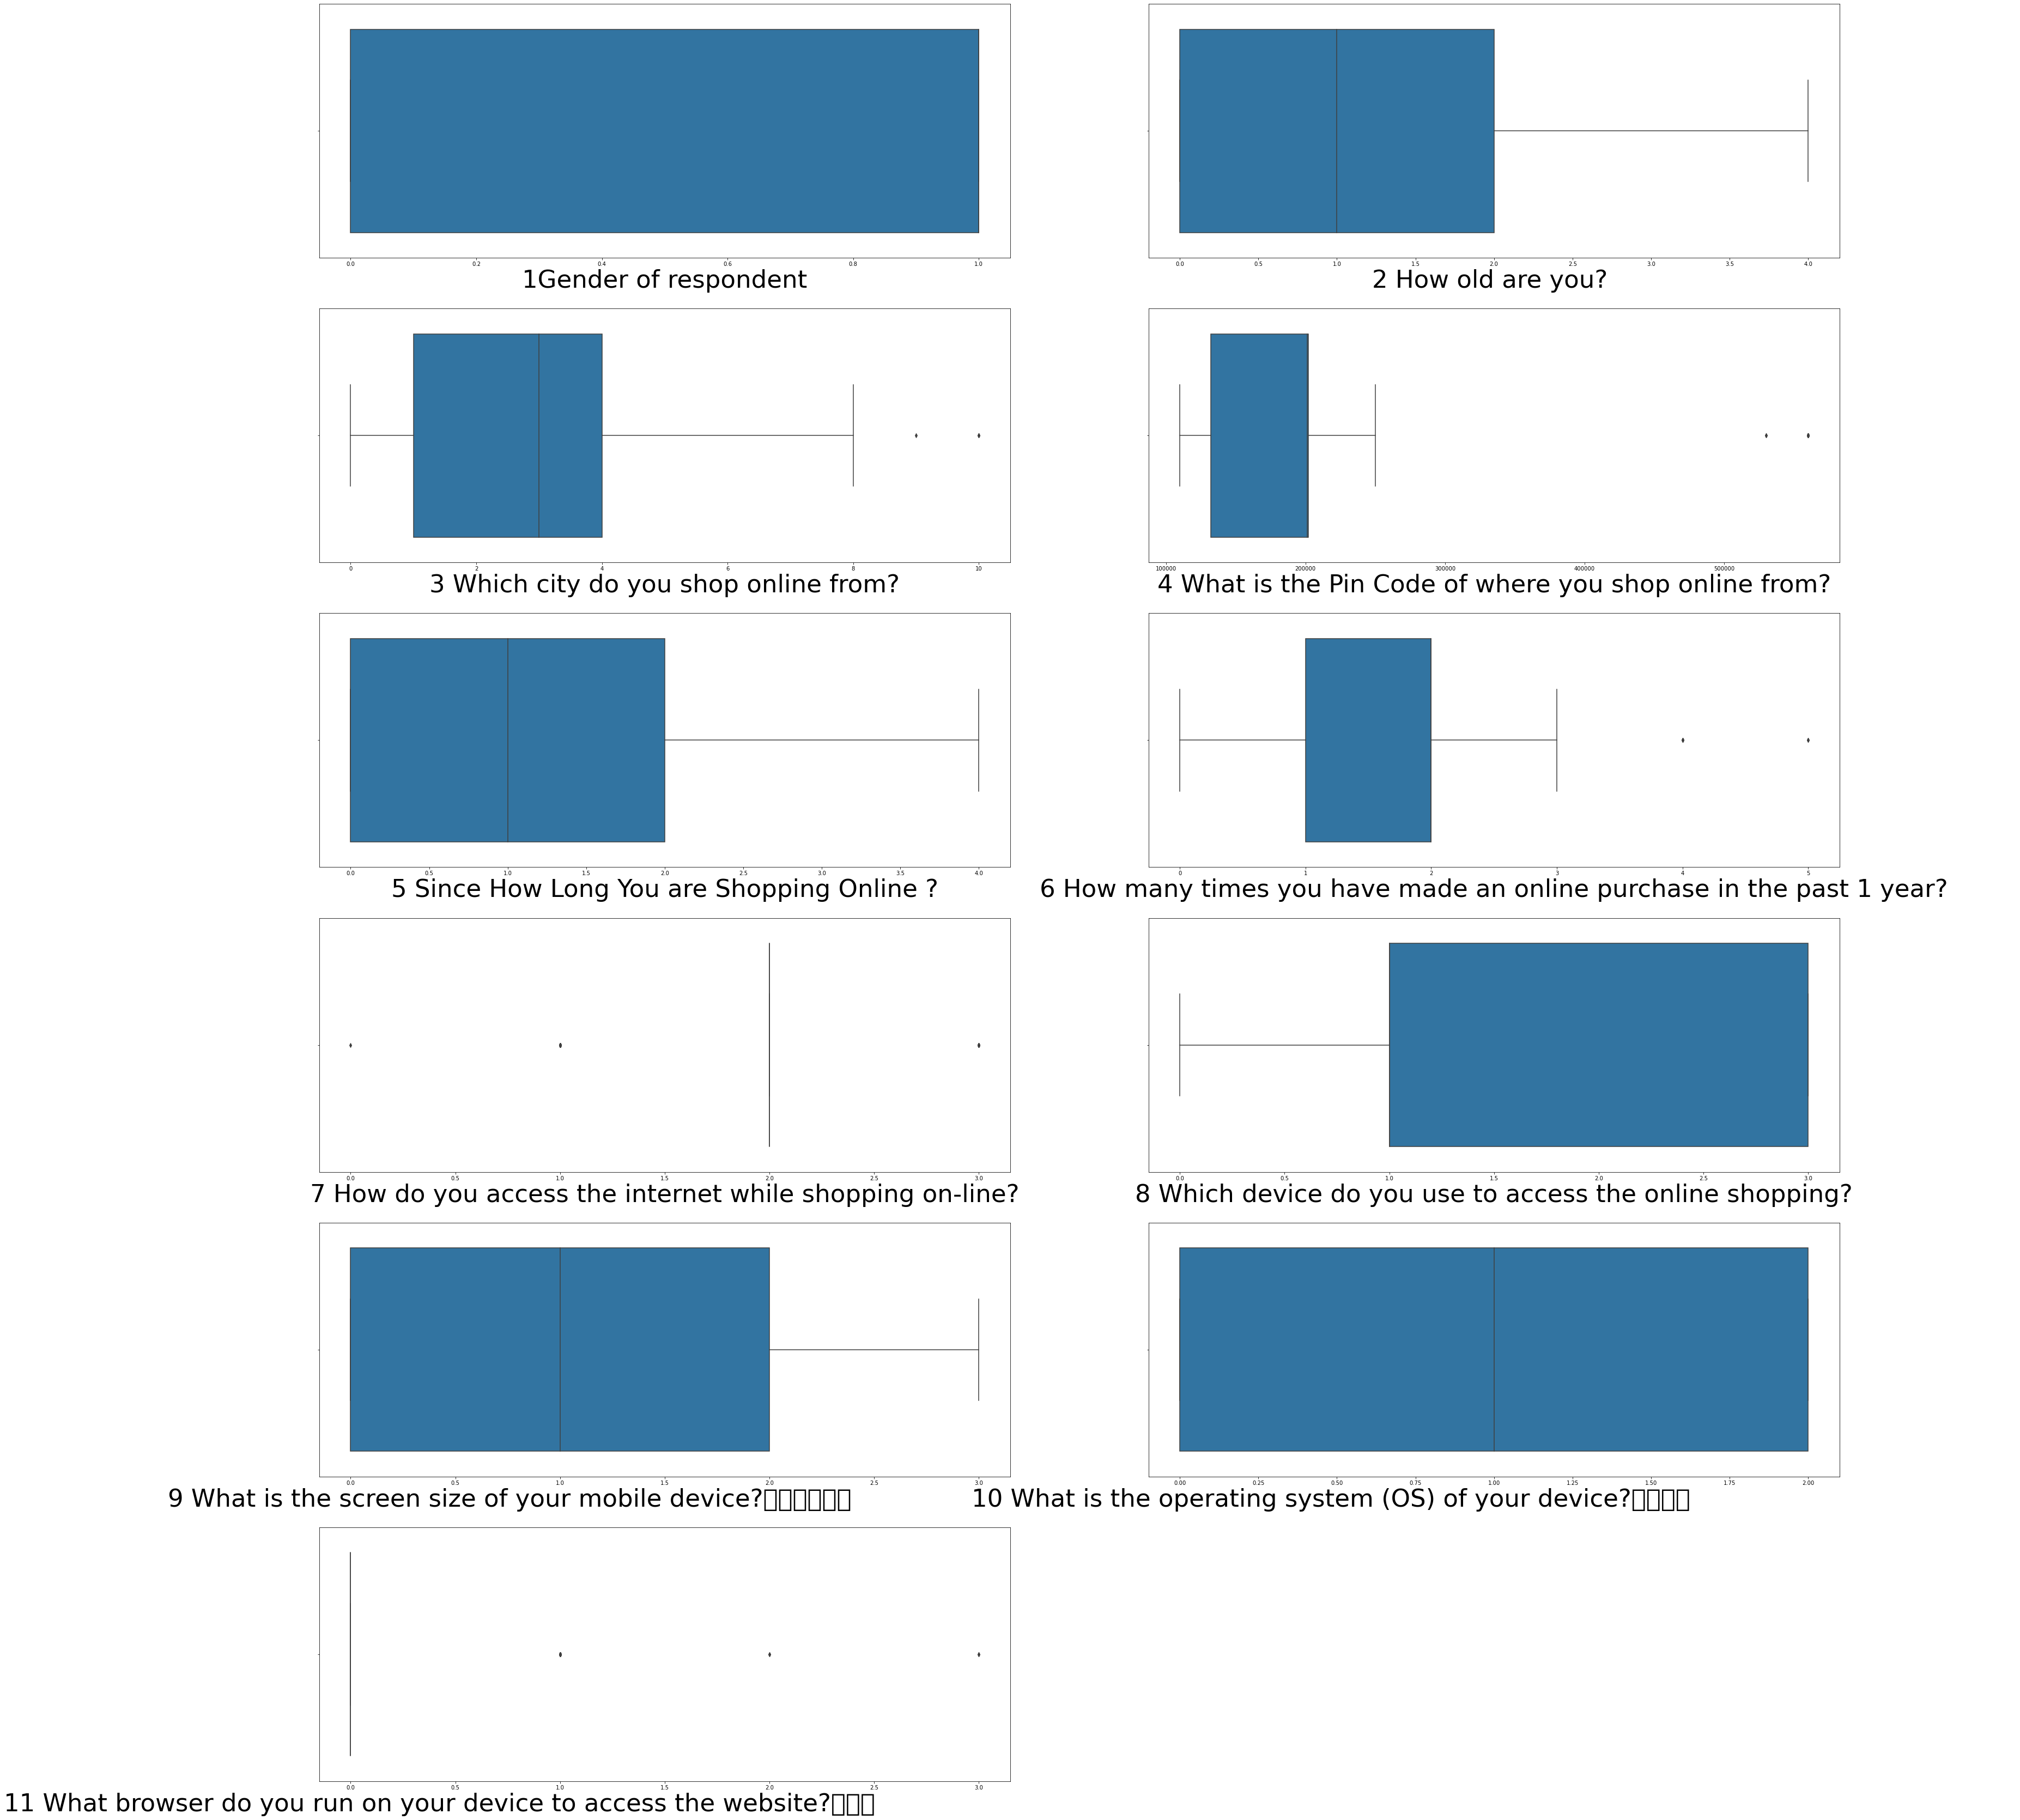

In [154]:
#Detecting outliers using boxplot and IQR
#visualize the outliers using boxplot
plt.figure(figsize=(50,60))
graph=1
for column in df:
    if graph <=11:
        ax=plt.subplot(6,2,graph)
        sns.boxplot(y[column],orient='v')
        plt.xlabel(column,fontsize=45)
    graph+=1
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         plt.show()    

In [131]:
#Find the IQR

#1st quantile
q1=y.quantile(0.25)

#3rd quantile
q3=y.quantile(0.75)

#IQR
iqr=q3-q1

In [ ]:
#Removing outliers from 3 Which city do you shop online from?
index=np.where(y['3 Which city do you shop online from?'] > (q3.3 Which city do you shop online from? +(1.5*iqr.3 Which city do you shop online from?)))
y=y.drop(y.index[index])
y.reset_index()



In [81]:
pd.options.display.max_columns=72

In [82]:
df.head()

1Gender of respondent  2 How old are you?   \
0                    0.0                  0.0   
1                    1.0                  1.0   
2                    1.0                  1.0   
3                    0.0                  1.0   
4                    1.0                  1.0   

   3 Which city do you shop online from?  \
0                                    0.0   
1                                    0.0   
2                                    1.0   
3                                    2.0   
4                                    3.0   

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

   5 Since How Long You are Shopping Online ?  \
0                                         0.0   
1                                         0.0   
2                                         1.0   
3                                         1.0   
4                                         2.0   

   6 How many times you have made an online purchase in the past 1 year?  \
0                                                0.0                       
1                                                1.0                       
2                                                1.0                       
3                                                2.0                       
4                                                3.0                       

   7 How do you access the internet while shopping on-line?  \
0                                                0.0          
1                                                1.0          
2                                                3.0          
3                                                3.0          
4                                                1.0          

   8 Which device do you use to access the online shopping?  \
0                                                0.0          
1                                                1.0          
2                                                1.0          
3                                                1.0          
4                                                1.0          

   9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                                0.0                                                      
1                                                1.0                                                      
2                                                2.0                                                      
3                                                2.0                                                      
4                                                1.0                                                      

   10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                                                0.0                                                        
1                                                1.0                                                        
2                                                2.0                                                        
3                                                1.0                                                        
4                                                1.0                                                        

   11 What browser do you run on your device to access the website?\t\t\t                                                            \
0                                                0.0                                                                                  
1   